### Question 1:

• DOMAIN: Healthcare

• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

• PROJECT OBJECTIVE: Demonstrate the ability to fetch, process and leverage data to generate useful predictions
by training Supervised Learning algorithms.

### Install the necessary libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold

### 1.1. - Import and warehouse data:

### Question 1.1.1 - Import all the given datasets and explore shape and size of each.

In [491]:
Normal_DF = pd.read_csv('Part1 - Normal.csv')
Type_H_DF = pd.read_csv('Part1 - Type_H.csv')
Type_S_DF = pd.read_csv('Part1 - Type_S.csv')

In [492]:
print('Normal_DF shape is : {}'.format(Normal_DF.shape))
print('Type_H_DF shape is : {}'.format(Type_H_DF.shape))
print('Type_S_DF shape is : {}'.format(Type_S_DF.shape))

Normal_DF shape is : (100, 7)
Type_H_DF shape is : (60, 7)
Type_S_DF shape is : (150, 7)


From Shape it is clearly visible that all the CSV Files have same number of columns i.e. 7 

No of rows in Part1 - Normal.csv is 100, 

No of rows in Part1 - Type_H.csv is 60,

No of rows in Part1 - Type_S.csv is 150,

In [493]:
Normal_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [494]:
Type_H_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [495]:
Type_S_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


From info command, it is clearly visible that all the files have same columns i.e.:
P_incidence,
P_tilt,
L_angle, 
S_slope, 
P_radius, 
S_degree, 
Class, 

All the columns are float except Class type which is object

Also we can see that all the columns are non-null but we need to see if it is having any garbage values or not to confirm that if the data is ready for analysis.

### Question 1.1.2 - Merge all datasets onto one and explore final shape and size

Concatenate Function can be used to merge all the three Data frames i.e. Normal_DF, Type_H_DF and Type_S_DF

Total no of rows should be 100 + 60 +150 = 310

In [496]:
Merged_Health_DF = pd.concat([Normal_DF,Type_H_DF,Type_S_DF]) # All the three Dataframes are merged onto one another

In [497]:
print('Merged_Health_DF shape is : {}'.format(Merged_Health_DF.shape)) # Final Shape of the merged Data frame

Merged_Health_DF shape is : (310, 7)


In [498]:
Merged_Health_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


From Above, We can see that all the Data Frames are merged on top of one another

Total number of rows are 310

Total number of columns are 7

### 1.2. - Data cleansing:

### Question 1.2.1 - Explore and if required correct the datatypes of each attribute

In [499]:
Merged_Health_DF.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,133
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [500]:
Merged_Health_DF.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [501]:
# Checking the unique values in the Class column
Merged_Health_DF.Class.unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

#### From above it is clearly visible that Class column is having 6 values for 3 data frames. 

Normal is also written as Nrmal

Type_H is also written as type_h

Type_S is also written as tp_s

#### Lets replace 

Nrmal ==> Normal

type_h ==> Type_H

tp_s ==> Type_S

In [502]:
Merged_Health_DF.Class = Merged_Health_DF.Class.replace('Nrmal','Normal')
Merged_Health_DF.Class = Merged_Health_DF.Class.replace('type_h','Type_H')
Merged_Health_DF.Class = Merged_Health_DF.Class.replace('tp_s','Type_S')

# Check for the unique values in Class column after replace action

Merged_Health_DF.Class.unique() 

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

#### Now all the Class items are classified into three main types i.e. 'Normal', 'Type_H', 'Type_S'

In [503]:
Merged_Health_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


#### From above we can see that total number of entries are 310 but the index seems to be disorganized and it is displyed as 0 to 149
     Int64Index: 310 entries, 0 to 149

In [504]:
Merged_Health_DF.head() # Check the start of the index

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [505]:
Merged_Health_DF.tail() # Check the end of the index

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
149,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


#### Reset the index with the help of reset_index function

In [506]:
Merged_Health_DF.reset_index(drop=True, inplace=True)

In [507]:
Merged_Health_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


#### Now we can see that range index is from 0 to 309
     RangeIndex: 310 entries, 0 to 309

#### Encode the Class variable to integer

In [508]:
label_Encoder = LabelEncoder()
Merged_Health_DF['Class'] = label_Encoder.fit_transform(Merged_Health_DF['Class'])

In [509]:
Merged_Health_DF['Class'].unique()

array([0, 1, 2])

In [510]:
Merged_Health_DF.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [511]:
### we can see that Class column is now converted into INT64 data type with the values as 0,1,2.

### Question 1.2.2 : Explore for null values in the attributes and if required drop or impute values.

In [512]:
#Checking the presence of any null values
Merged_Health_DF.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [513]:
# Different method to check the NUll values where the data type is bool
Merged_Health_DF.isnull().any()

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

#### From above we have checked that there are no NULL values but we also need to check if there are any symbols or any alphnumeric values

In [514]:
Merged_Health_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 15.9 KB


#### It is clearly visible that first 6 columns are with float64 data type and the 7th Column is Int64 and this means that it cannot hold any alphnumeric values

#### we can now conclude that there are no NULL values and no alphnumric vallues present in the Merged_Health_DF dataset. Hence nothing is required to be dropped or changed now

## Data analysis & visualisation:

### Question 1.3.1: Perform detailed statistical analysis on the data.

In [515]:
Merged_Health_DF.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,1.161290
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.884852
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,2.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,2.000000


In [516]:
# Check the skewness for Merged_Health_DF Dataframe
# P_incidence, L_angle, S_slope and S_Degree are right skeyed. (Outliers present towards right) - 
# same be viewed in the Histograms below

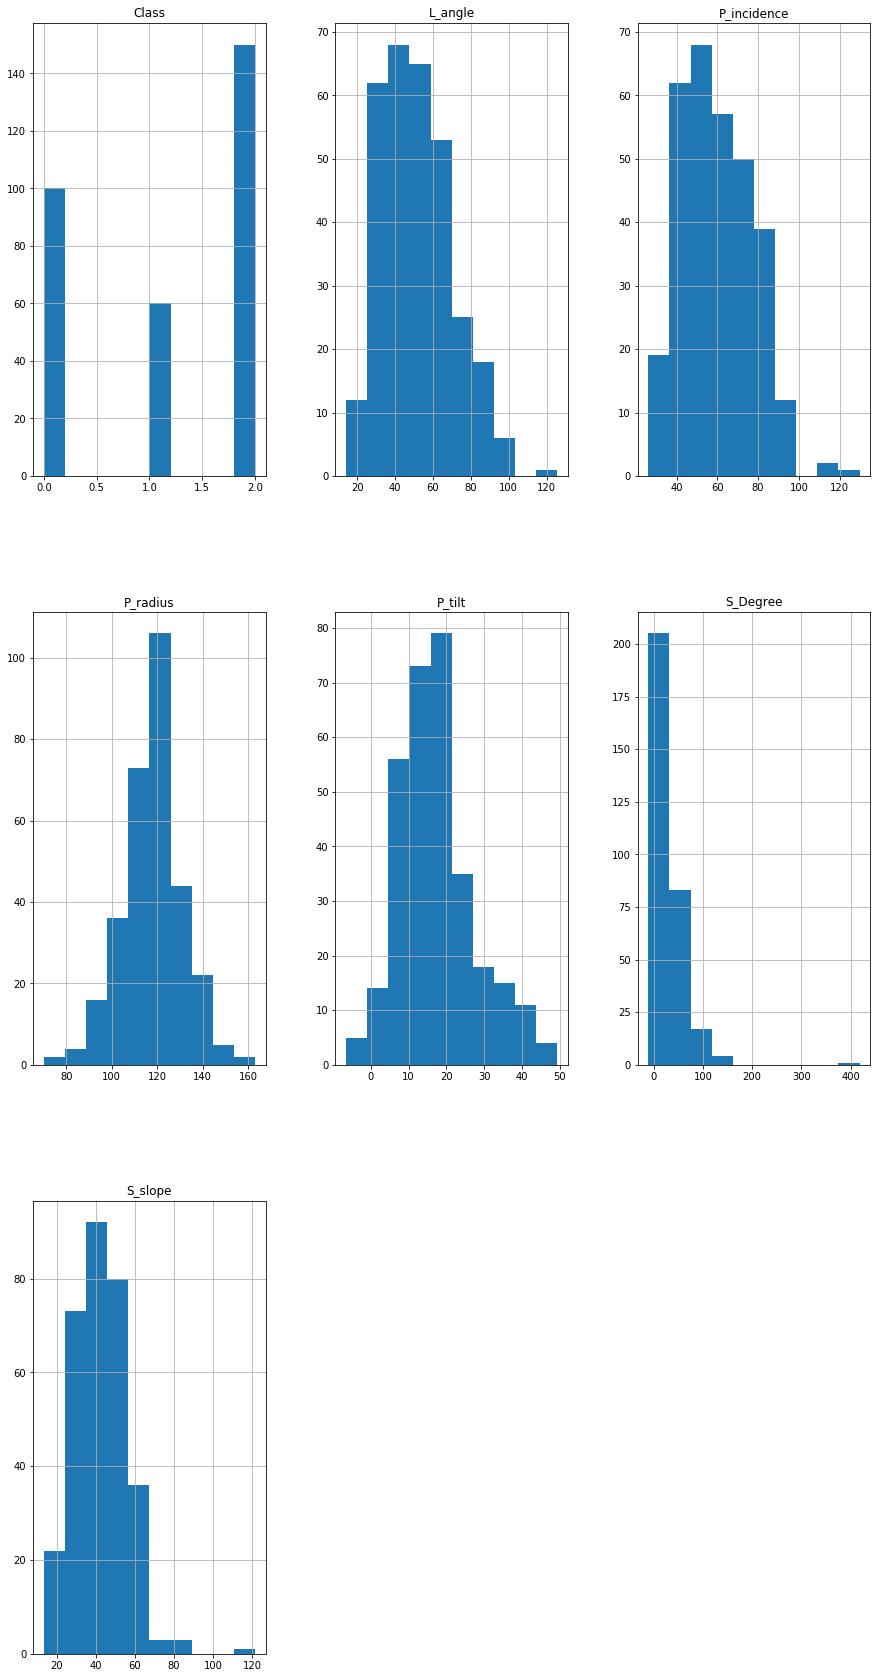

In [517]:
Merged_Health_DF.hist(figsize=(15,30)); # as per the histograms we can see that P_incidence, L_angle, S_slope and S_Degree are right skeyed

In [518]:
Merged_Health_DF.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.537638
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.348231
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.525466
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.430734
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.304099
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.608705
Class,0.537638,0.348231,0.525466,0.430734,-0.304099,0.608705,1.000000


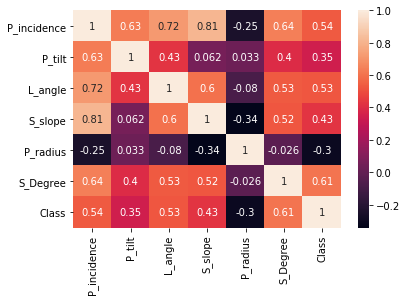

In [519]:
sns.heatmap(Merged_Health_DF.corr(),annot=True);

In above plot, yellow colour represents maximum correlation and blue colour represents minimum correlation. 

##### P_radius is not much correlated with any other variable

##### P_incidence and S_slope are correlated to a greater extent with Correlated value as 0.814960

##### P_incidence and L_angle are also correlated to 0.717282 value

##### will do the correlation again once the outiers are removed to proide more correct details

### Question 1.3.2 : Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

#### Univariate plots for P_incidence

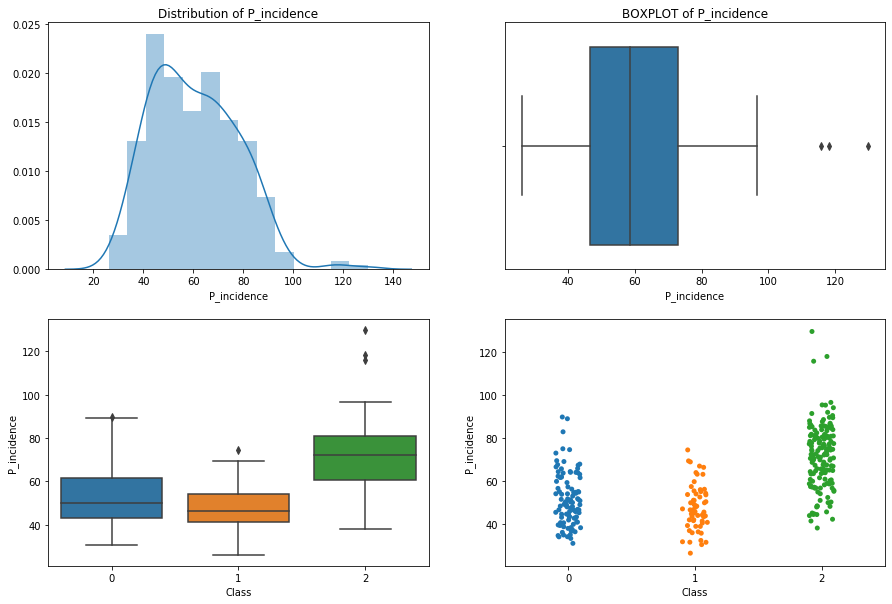

In [527]:
fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.distplot(Merged_Health_DF.P_incidence); # Plotting the histogram for P_incidence
plt.title("Distribution of P_incidence")
plt.subplot(2, 2, 2)
sns.boxplot(Merged_Health_DF.P_incidence)
plt.title("BOXPLOT of P_incidence")
plt.subplot(2, 2, 3)
sns.boxplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.P_incidence)
plt.subplot(2, 2, 4)
sns.stripplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.P_incidence)
plt.show()

In [531]:
# We can see that there are outliers for P_incidence and we can remove them from the dataset

Merged_Health_Out = Merged_Health_DF

In [532]:
# P_incidence_IQR = 
P_incidence_Q1 = Merged_Health_Out.P_incidence.quantile(0.25)
P_incidence_Q3 = Merged_Health_Out.P_incidence.quantile(0.75)
P_incidence_IQR = P_incidence_Q3-P_incidence_Q1

# Lower Fence and Upper fence
Upper_Fence1 = P_incidence_Q3 + (1.5 * P_incidence_IQR)
Lower_Fence1 = P_incidence_Q1 - (1.5 * P_incidence_IQR)

Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.P_incidence <= Upper_Fence1]

In [538]:
# remove the Outliers from the Merged dataframe 

In [540]:
Merged_Health_Out.Class.count()

307

In [534]:
# Earlier total number of rows were 310 and after removal of the 3 outliers we can see that dataframe is having 307 rows

#### Univariate plots for S_slope

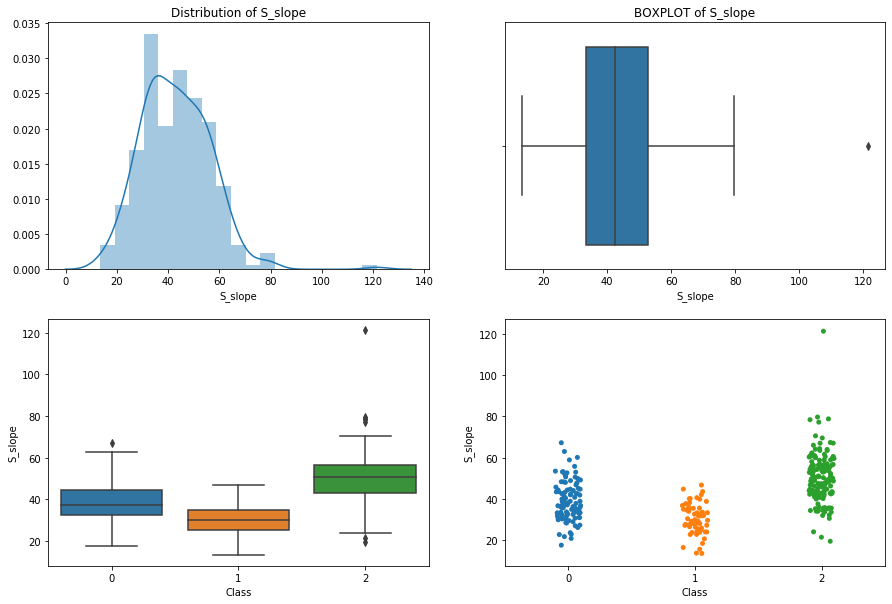

In [541]:
fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.distplot(Merged_Health_DF.S_slope); # Plotting the histogram for P_incidence
plt.title("Distribution of S_slope")
plt.subplot(2, 2, 2)
sns.boxplot(Merged_Health_DF.S_slope)
plt.title("BOXPLOT of S_slope")
plt.subplot(2, 2, 3)
sns.boxplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.S_slope)
plt.subplot(2, 2, 4)
sns.stripplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.S_slope)
plt.show()

In [544]:
# Removing the Outliers from S_slope = 
S_slope_Q1 = Merged_Health_Out.S_slope.quantile(0.25)
S_slope_Q3 = Merged_Health_Out.S_slope.quantile(0.75)
S_slope_IQR = S_slope_Q3-S_slope_Q1

# Lower Fence and Upper fence
Upper_Fence2 = S_slope_Q3 + (1.5 * S_slope_IQR)
Lower_Fence2 = S_slope_Q1 - (1.5 * S_slope_IQR)

Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.S_slope <= Upper_Fence2]
Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.S_slope >= Lower_Fence2]

In [545]:
Merged_Health_Out.Class.count()

307

#### Univariate plots for L_angle

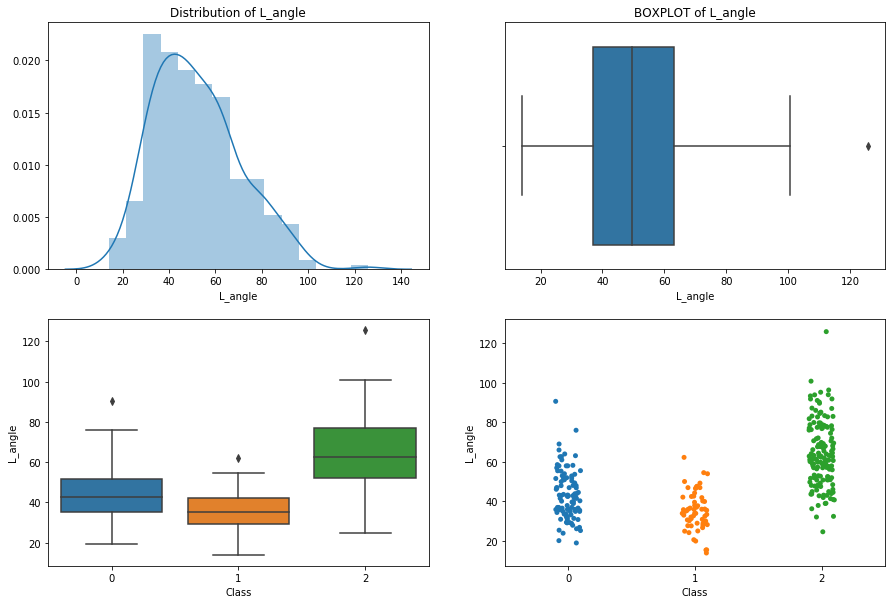

In [537]:
# Plotting the histogram for L_angle

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.distplot(Merged_Health_DF.L_angle); 
plt.title("Distribution of L_angle")
plt.subplot(2, 2, 2)
sns.boxplot(Merged_Health_DF.L_angle)
plt.title("BOXPLOT of L_angle")
plt.subplot(2, 2, 3)
sns.boxplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.L_angle)
plt.subplot(2, 2, 4)
sns.stripplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.L_angle)
plt.show()

In [546]:
# 1 outlier in the L_angle

In [547]:
# L_angle_IQR = 
L_angle_Q1 = Merged_Health_Out.L_angle.quantile(0.25)
L_angle_Q3 = Merged_Health_Out.L_angle.quantile(0.75)
L_angle_IQR = L_angle_Q3-L_angle_Q1

# Lower Fence and Upper fence
Upper_Fence3 = L_angle_Q3 + (1.5 * L_angle_IQR)
Lower_Fence3 = L_angle_Q1 - (1.5 * L_angle_IQR)

# remove the Outliers from the Merged_Health_Out data frame 
Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.L_angle <= Upper_Fence3]
Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.L_angle >= Lower_Fence3]

In [548]:
Merged_Health_Out.Class.count()

306

In [550]:
# total no of rows are 306 now

In [ ]:
#### Univariate plot for 

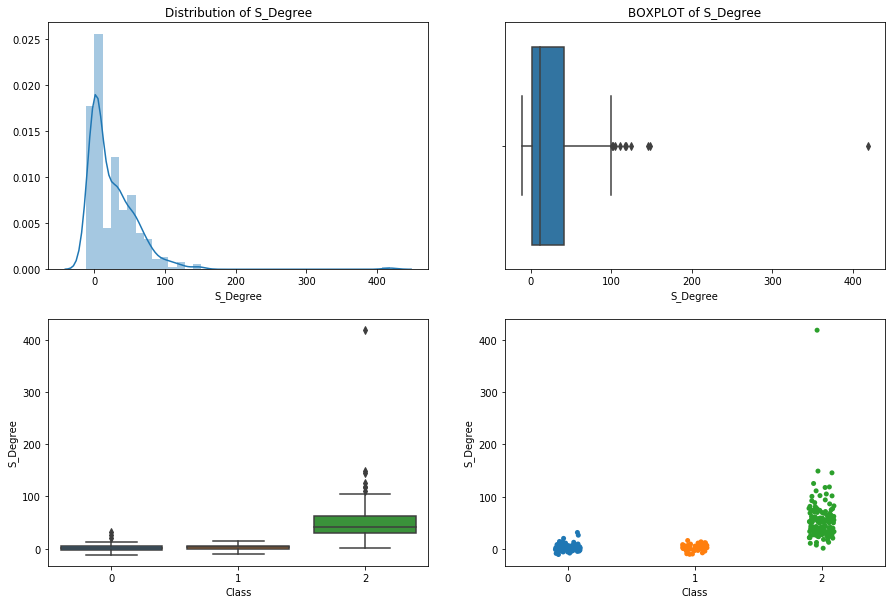

In [551]:
# Plotting the histogram for S_Degree

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.distplot(Merged_Health_DF.S_Degree); 
plt.title("Distribution of S_Degree")
plt.subplot(2, 2, 2)
sns.boxplot(Merged_Health_DF.S_Degree)
plt.title("BOXPLOT of S_Degree")
plt.subplot(2, 2, 3)
sns.boxplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.S_Degree)
plt.subplot(2, 2, 4)
sns.stripplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.S_Degree)
plt.show()

In [552]:
# Removin the outlliers from S_Degree
S_Degree_Q1 = Merged_Health_Out.S_Degree.quantile(0.25)
S_Degree_Q3 = Merged_Health_Out.S_Degree.quantile(0.75)
S_Degree_IQR = S_Degree_Q3-S_Degree_Q1

# Lower Fence and Upper fence
Upper_Fence4 = S_Degree_Q3 + (1.5 * S_Degree_IQR)
Lower_Fence4 = S_Degree_Q1 - (1.5 * S_Degree_IQR)

# remove the Outliers from the Merged_Health_1 data frame 
Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.S_Degree <= Upper_Fence4]
Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.S_Degree >= Lower_Fence4]

In [553]:
Merged_Health_Out.Class.count()

297

#### Univariate plots for P_radius

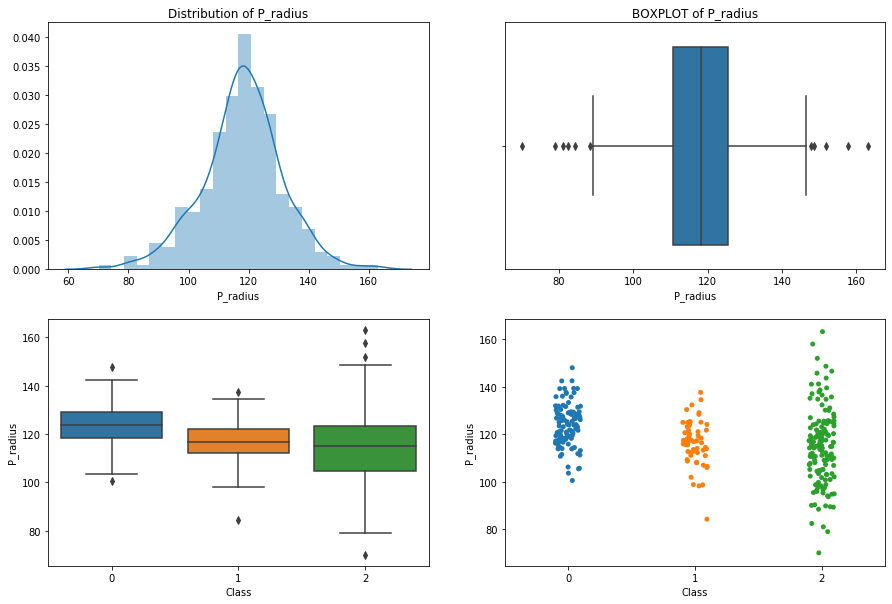

In [536]:
# Plotting the histogram for P_radius

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.distplot(Merged_Health_DF.P_radius); 
plt.title("Distribution of P_radius")
plt.subplot(2, 2, 2)
sns.boxplot(Merged_Health_DF.P_radius)
plt.title("BOXPLOT of P_radius")
plt.subplot(2, 2, 3)
sns.boxplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.P_radius)
plt.subplot(2, 2, 4)
sns.stripplot(x=Merged_Health_DF.Class, y=Merged_Health_DF.P_radius)
plt.show()

In [555]:
# Removing the Outliers from P_radius
P_radius_Q1 = Merged_Health_Out.P_radius.quantile(0.25)
P_radius_Q3 = Merged_Health_Out.P_radius.quantile(0.75)
P_radius_IQR = P_radius_Q3-P_radius_Q1

# Lower Fence and Upper fence
Upper_Fence5 = P_radius_Q3 + (1.5 * P_radius_IQR)
Lower_Fence5 = P_radius_Q1 - (1.5 * P_radius_IQR)

# remove the Outliers from the Merged_Health_Out data frame 
Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.P_radius <= Upper_Fence5]
Merged_Health_Out = Merged_Health_Out[Merged_Health_Out.P_radius >= Lower_Fence5]
Merged_Health_Out.Class.count()

286

In [653]:
# total no of rows are 286 now in Merged_Health_Out

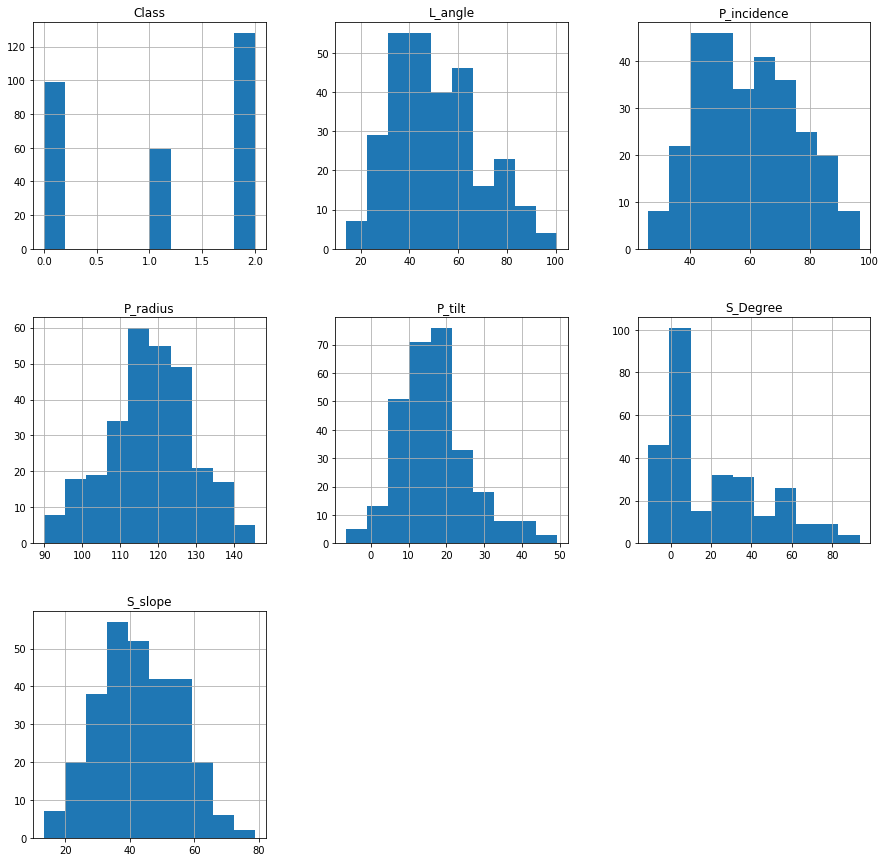

In [572]:
Merged_Health_Out.hist(figsize=(15,15));

#### Bivariate and Multivariate Plots for Merged_Health_DF dataframe

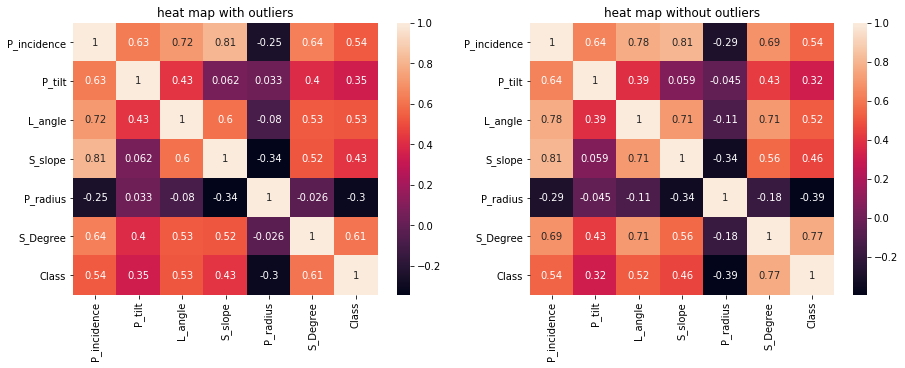

In [559]:
fig = plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.heatmap(Merged_Health_DF.corr(),annot=True);
plt.title("heat map with outliers")
plt.subplot(1, 2, 2)
sns.heatmap(Merged_Health_Out.corr(),annot=True);
plt.title("heat map without outliers")
plt.show()

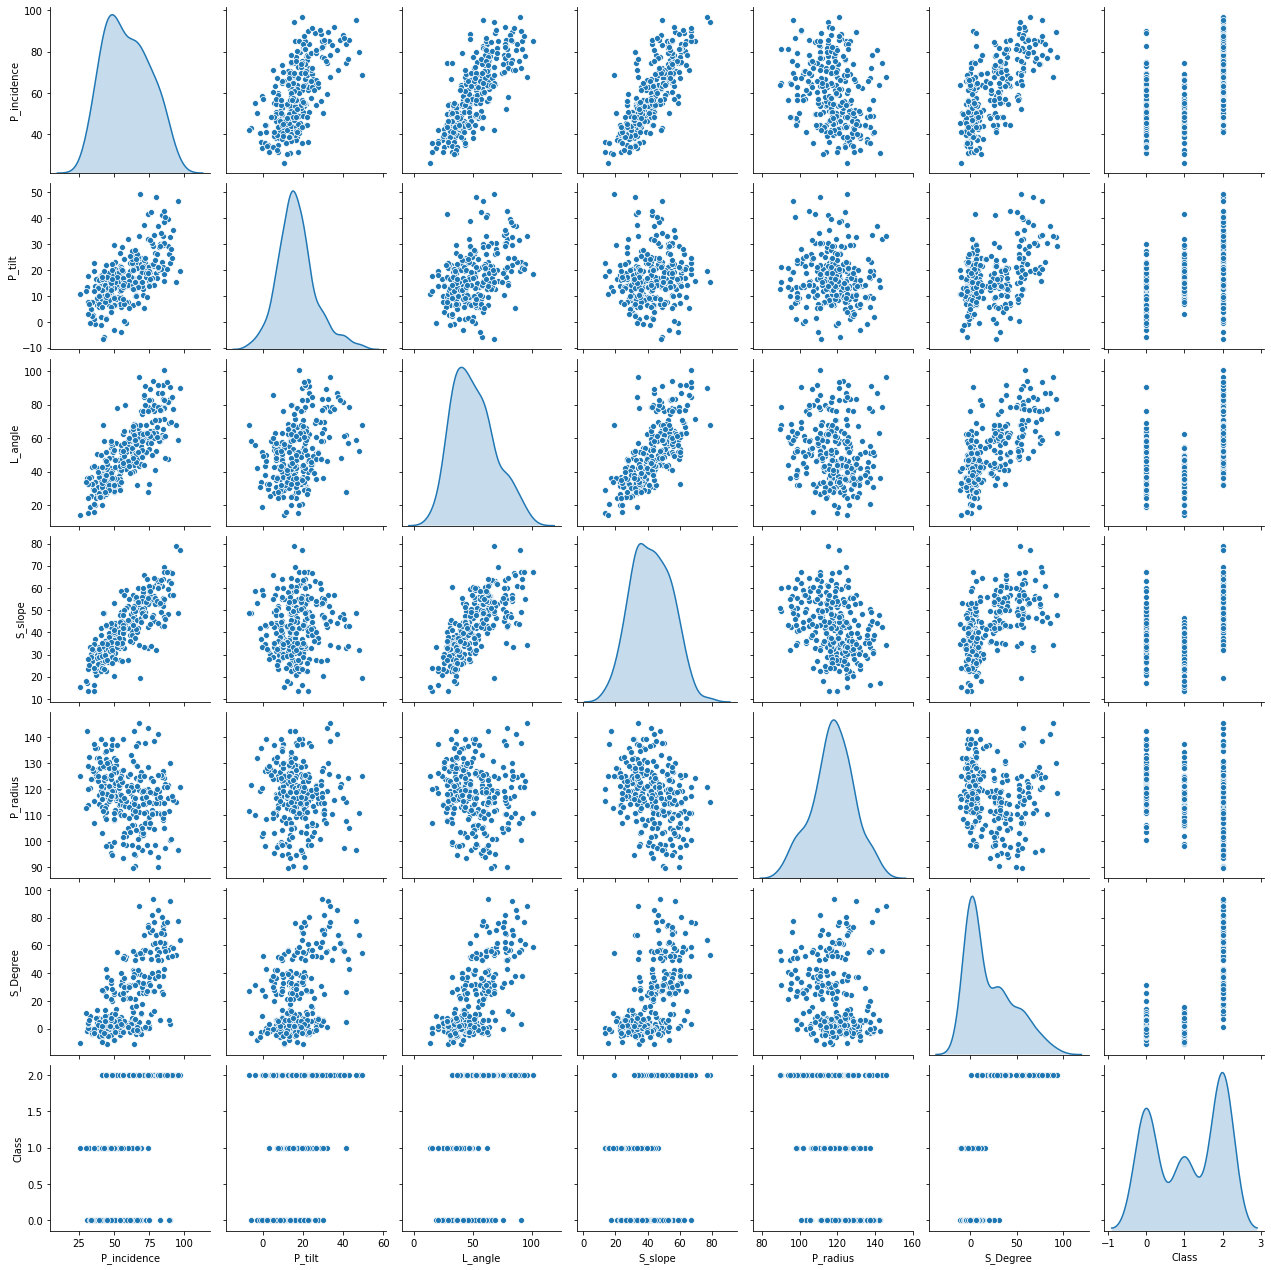

In [560]:
#distribution of class values and other attributes
sns.pairplot(Merged_Health_Out,diag_kind='kde');
# We know that Class 0 is represents 'Normal', Class 1 represents 'Type_H' and Class 1 represents 'Type_S'

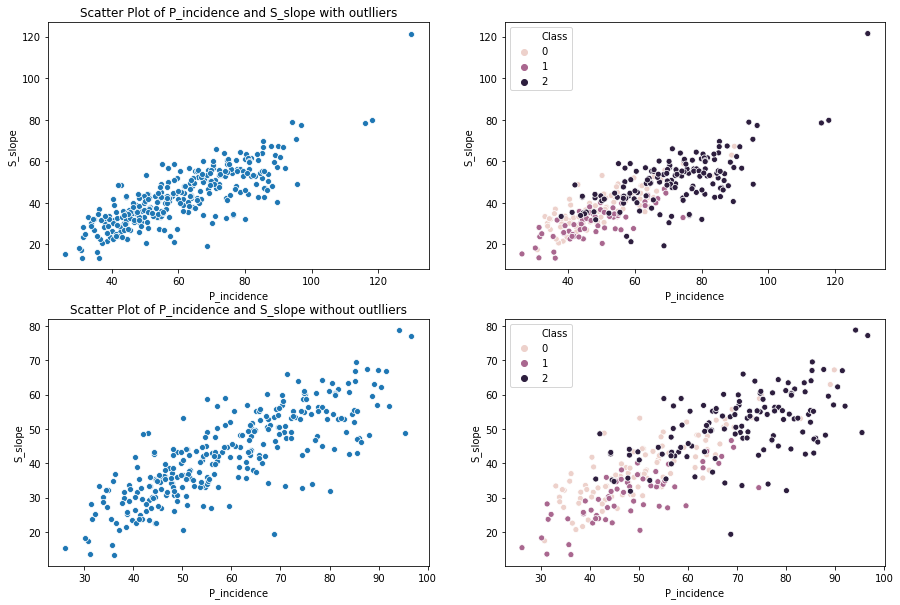

In [564]:
# Plotting the histogram for P_incidence and S_slope

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(Merged_Health_DF.P_incidence,Merged_Health_DF.S_slope)
plt.title("Scatter Plot of P_incidence and S_slope with outlliers")
plt.subplot(2, 2, 2)
sns.scatterplot(Merged_Health_DF.P_incidence,Merged_Health_DF.S_slope,hue=Merged_Health_DF.Class)
plt.subplot(2, 2, 3)
plt.title("Scatter Plot of P_incidence and S_slope without outlliers")
sns.scatterplot(Merged_Health_Out.P_incidence,Merged_Health_Out.S_slope)
plt.subplot(2, 2, 4)
sns.scatterplot(Merged_Health_Out.P_incidence,Merged_Health_Out.S_slope,hue=Merged_Health_Out.Class)
plt.show()

##### From above, we can see that P_incidence and S_slope related to each other

In [1]:
# Plotting the histogram for P_incidence and L_angle

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(Merged_Health_DF.P_incidence,Merged_Health_DF.L_angle)
plt.title("Scatter Plot of P_incidence and L_angle with outlliers")
plt.subplot(2, 2, 2)
sns.scatterplot(Merged_Health_DF.P_incidence,Merged_Health_DF.L_angle,hue=Merged_Health_DF.Class)
plt.subplot(2, 2, 3)
plt.title("Scatter Plot of P_incidence and L_angle without outlliers")
sns.scatterplot(Merged_Health_Out.MonthlyCharges,Merged_Health_Out.StreamingTV)
plt.subplot(2, 2, 4)
sns.scatterplot(Merged_Health_Out.MonthlyCharges,Merged_Health_Out.StreamingMovies)
plt.show()

NameError: name 'plt' is not defined

##### From above, we can see that P_incidence and L_angle related to each other

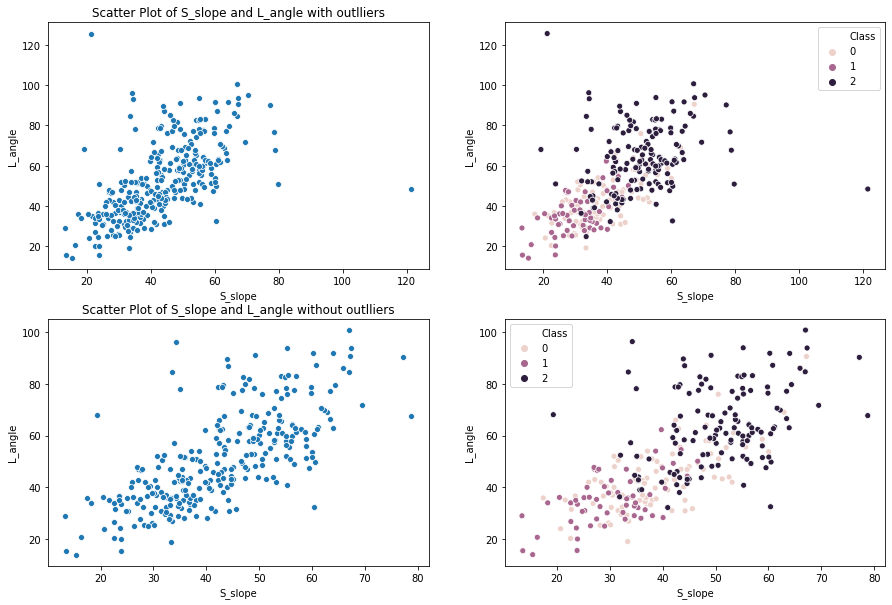

In [567]:
# Plotting the histogram for S_slope and L_angle

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(Merged_Health_DF.S_slope,Merged_Health_DF.L_angle)
plt.title("Scatter Plot of S_slope and L_angle with outlliers")
plt.subplot(2, 2, 2)
sns.scatterplot(Merged_Health_DF.S_slope,Merged_Health_DF.L_angle,hue=Merged_Health_DF.Class)
plt.subplot(2, 2, 3)
plt.title("Scatter Plot of S_slope and L_angle without outlliers")
sns.scatterplot(Merged_Health_Out.S_slope,Merged_Health_Out.L_angle)
plt.subplot(2, 2, 4)
sns.scatterplot(Merged_Health_Out.S_slope,Merged_Health_Out.L_angle,hue=Merged_Health_Out.Class)
plt.show()

##### From Above, S_slope and L_angle are related to an extent

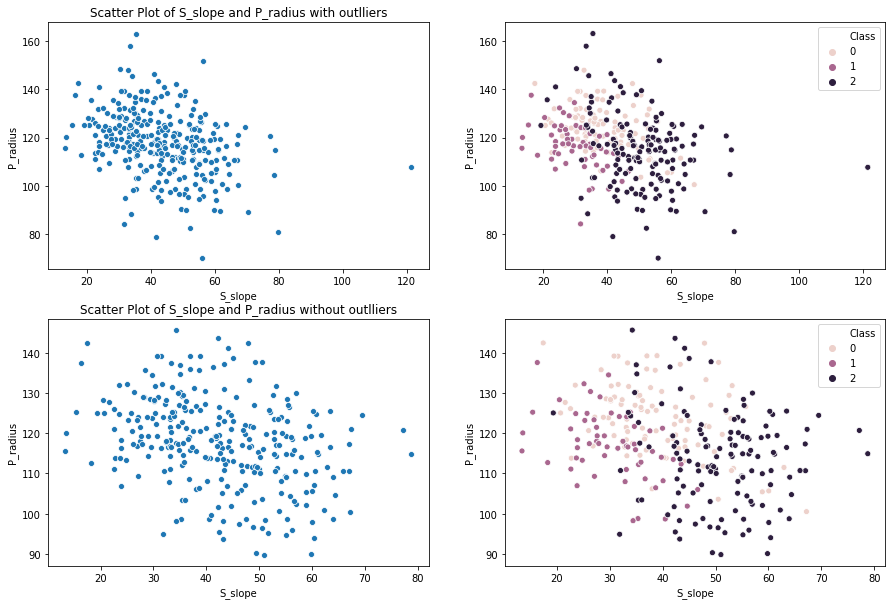

In [569]:
# Plotting the histogram for S_slope and L_angle

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(Merged_Health_DF.S_slope,Merged_Health_DF.P_radius)
plt.title("Scatter Plot of S_slope and P_radius with outlliers")
plt.subplot(2, 2, 2)
sns.scatterplot(Merged_Health_DF.S_slope,Merged_Health_DF.P_radius,hue=Merged_Health_DF.Class)
plt.subplot(2, 2, 3)
plt.title("Scatter Plot of S_slope and P_radius without outlliers")
sns.scatterplot(Merged_Health_Out.S_slope,Merged_Health_Out.P_radius)
plt.subplot(2, 2, 4)
sns.scatterplot(Merged_Health_Out.S_slope,Merged_Health_Out.P_radius,hue=Merged_Health_Out.Class)
plt.show()

##### From Above, S_slope and L_angle are Not Correlated

## Data pre-processing:

### Question 1.4.1: Segregate predictors vs target attributes

In [573]:
# Predictors
X = Merged_Health_DF.drop('Class',axis=1)
# Target
y = Merged_Health_DF.Class
X.info() # We can see that Class Variable is dropped from the predictor dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
dtypes: float64(6)
memory usage: 14.7 KB


### Question 1.4.2: Perform normalisation or scaling if required.

In [574]:
# # convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# # It is always adviced to scale numeric attributes in models that calculate distances.

# XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

# XScaled.describe()

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
XScaled = sc.fit_transform(X)

# Tried with both Standard scaler and Z score, Results are same

### Question 1.4.3: Check for target balancing. Add your comments

In [575]:
y.count()

310

In [576]:
# Below is the classification of Class 0, 1 and 2 in the final data frame now

In [581]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 100]
 [  1  60]
 [  2 150]]


##### as per above classfication our data should be splitted into training and testing datasets

### Question 1.4.4: Perform train-test split

In [584]:
# Split X and y into training and test set in 70:30 ratio
# Startify is used to make sure that data is classided proportionally basis on the classes
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30,stratify=y)

In [585]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)
y_train.count()

[[  0  70]
 [  1  42]
 [  2 105]]


217

In [586]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)
y_test.count()

[[ 0 30]
 [ 1 18]
 [ 2 45]]


93

In [587]:
# planning to split the data basis on the 70:30 ratio where training is 70% and testing data is 30%

In [588]:
print('Class 0 training data is {}'.format(len(y_train[y_train == 0])/len(y_train)*100))
print('Class 1 training data is {}'.format(len(y_train[y_train == 1])/len(y_train)*100))
print('Class 2 training data is {}'.format(len(y_train[y_train == 2])/len(y_train)*100))

Class 0 training data is 32.25806451612903
Class 1 training data is 19.35483870967742
Class 2 training data is 48.38709677419355


In [589]:
print('Class 0 testing data is {}'.format(len(y_test[y_test == 0])/len(y_test)*100))
print('Class 1 testing data is {}'.format(len(y_test[y_test == 1])/len(y_test)*100))
print('Class 2 testing data is {}'.format(len(y_test[y_test == 2])/len(y_test)*100))

Class 0 testing data is 32.25806451612903
Class 1 testing data is 19.35483870967742
Class 2 testing data is 48.38709677419355


## Model training, testing and tuning:

### Question 1.5.1: Design and train a KNN classifier.

In [590]:
# Lets choose the K basis on the simple formula i.e. Square root of n (n = number of data points in training data)
# Square root(217)  and choose the odd number i.e. 15

In [591]:
KNN = KNeighborsClassifier(n_neighbors= 15,weights = 'uniform', metric = 'euclidean')

In [592]:
# Call Nearest Neighbour algorithm
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

### Question 1.5.2: Display the classification accuracies for train and test data

In [594]:
# For every test data point, predict it's label based on 15 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNN.predict(X_test)
print('Testing Accuracy when K = 15 is {}'.format(KNN.score(X_test, y_test)))
print('Training Accuracy when K = 15 is {}'.format(KNN.score(X_train, y_train)))

Testing Accuracy when K = 15 is 0.7956989247311828
Training Accuracy when K = 15 is 0.8110599078341014


In [595]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[27  2  1]
 [10  8  0]
 [ 4  2 39]]


Confusion Matrix


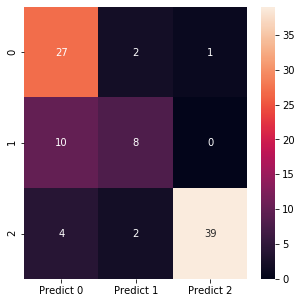

In [599]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1,2]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)

### Question 1.5.3: Display and explain the classification report in detail

In [603]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76        30
           1       0.67      0.44      0.53        18
           2       0.97      0.87      0.92        45

    accuracy                           0.80        93
   macro avg       0.77      0.74      0.74        93
weighted avg       0.81      0.80      0.79        93



### Question 1.5.4: Automate the task of finding best values of K for KNN

In [604]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k,weights = 'uniform', metric = 'euclidean')
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

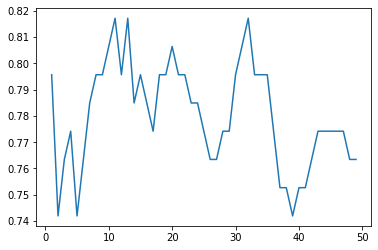

In [605]:
plt.plot(range(1,50),scores)

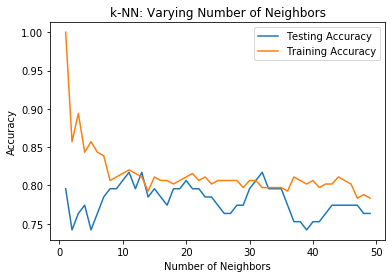

In [606]:
K= np.arange(1, 50)
train_accuracy_plot = np.empty(len(K))
test_accuracy_plot = np.empty(len(K))
for i, k in enumerate(K):
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'uniform', metric = 'euclidean')
    knn.fit(X_train,y_train)
    train_accuracy_plot[i] = knn.score(X_train,y_train)
    test_accuracy_plot[i] = knn.score(X_test,y_test) 
       
# Generate plot

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(K, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(K, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

###### From above graph we can see that, when the value of K= 5, Max testing score is .78 and Training score is also maximum i.e. .88

### Question 1.5.5: Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model

In [641]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


##### As per the hyprtuned model, we have got the K as 3

In [608]:
predict = best_model.predict(X_test)

In [613]:
print('Testing Accuracy when K = 3 is {}'.format(best_model.score(X_test, y_test)))
print('Training Accuracy when K = 3 is {}'.format(best_model.score(X_train, y_train)))

Testing Accuracy when K = 3 is 0.8172043010752689
Training Accuracy when K = 3 is 0.9032258064516129


In [611]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        30
           1       0.62      0.56      0.59        18
           2       1.00      0.91      0.95        45

    accuracy                           0.82        93
   macro avg       0.77      0.77      0.77        93
weighted avg       0.83      0.82      0.82        93



##### Above Accuracy and the calssification report is for the Tuned model where outliers are not removed

Confusion Matrix


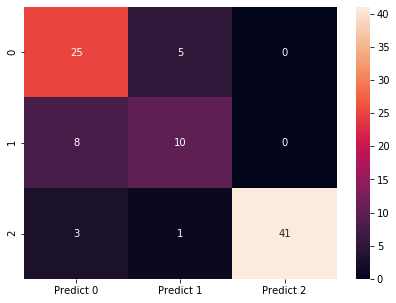

In [612]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predict, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1,2]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Lets train the model again when the outliers are removed from the data frame which is already calculated in the above steps with data frame of Merged_Health_Out

In [624]:
# Predictors
X_out = Merged_Health_Out.drop('Class',axis=1)
# Target
y_out = Merged_Health_Out.Class
X_out.info() # We can see that Class Variable is dropped from the predictor dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 309
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  286 non-null    float64
 1   P_tilt       286 non-null    float64
 2   L_angle      286 non-null    float64
 3   S_slope      286 non-null    float64
 4   P_radius     286 non-null    float64
 5   S_Degree     286 non-null    float64
dtypes: float64(6)
memory usage: 25.6 KB


In [629]:
# # convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# # It is always adviced to scale numeric attributes in models that calculate distances.

# XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

# XScaled.describe()

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
XScaled_out = sc.fit_transform(X_out)

# Tried with both Standard scaler and Z score, Results are same

In [630]:
# Below is the classification of Class 0, 1 and 2 in the data frame where the outliers are removed

In [631]:
unique, counts = np.unique(y_out, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  99]
 [  1  59]
 [  2 128]]


In [632]:
# Split X and y into training and test set in 70:30 ratio
# Startify is used to make sure that data is classided proportionally basis on the classes
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(XScaled_out, y_out, test_size=0.30,stratify=y_out)

In [635]:
unique, counts = np.unique(y_train_out, return_counts=True)
print(np.asarray((unique, counts)).T)
y_train_out.count()

[[ 0 69]
 [ 1 41]
 [ 2 90]]


200

In [636]:
unique, counts = np.unique(y_test_out, return_counts=True)
print(np.asarray((unique, counts)).T)
y_test_out.count()

[[ 0 30]
 [ 1 18]
 [ 2 38]]


86

In [637]:
# planning to split the data basis on the 70:30 ratio where training is 70% and testing data is 30%

In [639]:
print('Class 0 training data is {} when the outliers are removed'.format(len(y_train_out[y_train_out == 0])/len(y_train_out)*100))
print('Class 1 training data is {} when the outliers are removed'.format(len(y_train_out[y_train_out == 1])/len(y_train_out)*100))
print('Class 2 training data is {} when the outliers are removed'.format(len(y_train_out[y_train_out == 2])/len(y_train_out)*100))

Class 0 training data is 34.5 when the outliers are removed
Class 1 training data is 20.5 when the outliers are removed
Class 2 training data is 45.0 when the outliers are removed


In [640]:
print('Class 0 testing data is {} when the outliers are removed'.format(len(y_test_out[y_test_out == 0])/len(y_test_out)*100))
print('Class 1 testing data is {} when the outliers are removed'.format(len(y_test_out[y_test_out == 1])/len(y_test_out)*100))
print('Class 2 testing data is {} when the outliers are removed'.format(len(y_test_out[y_test_out == 2])/len(y_test_out)*100))

Class 0 testing data is 34.883720930232556 when the outliers are removed
Class 1 testing data is 20.930232558139537 when the outliers are removed
Class 2 testing data is 44.18604651162791 when the outliers are removed


In [642]:
KNN_out = KNeighborsClassifier(n_neighbors= 15,weights = 'uniform', metric = 'euclidean')

# Call Nearest Neighbour algorithm
KNN_out.fit(X_train_out, y_train_out)

# For every test data point, predict it's label based on 15 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels_out = KNN_out.predict(X_test_out)
print('Testing Accuracy when K = 15 is {}'.format(KNN.score(X_test_out, y_test_out)))
print('Training Accuracy when K = 15 is {}'.format(KNN.score(X_train_out, y_train_out)))

Testing Accuracy when K = 15 is 0.8023255813953488
Training Accuracy when K = 15 is 0.8


In [644]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test_out, predicted_labels_out))

[[23  5  2]
 [ 7 11  0]
 [ 2  1 35]]


Confusion Matrix


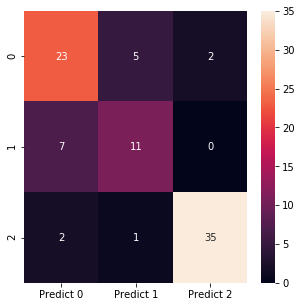

In [645]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test_out, predicted_labels_out, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1,2]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)

In [655]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_out,predicted_labels_out))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.65      0.61      0.63        18
           2       0.95      0.92      0.93        38

    accuracy                           0.80        86
   macro avg       0.77      0.77      0.77        86
weighted avg       0.80      0.80      0.80        86



In [656]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k,weights = 'uniform', metric = 'euclidean')
    NNH.fit(X_train_out, y_train_out)
    scores.append(NNH.score(X_test_out, y_test_out))

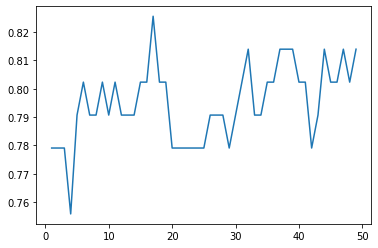

In [657]:
plt.plot(range(1,50),scores)

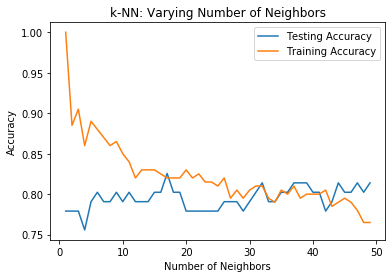

In [647]:
K= np.arange(1, 50)
train_accuracy_plot = np.empty(len(K))
test_accuracy_plot = np.empty(len(K))
for i, k in enumerate(K):
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'uniform', metric = 'euclidean')
    knn.fit(X_train_out,y_train_out)
    train_accuracy_plot[i] = knn.score(X_train_out,y_train_out)
    test_accuracy_plot[i] = knn.score(X_test_out,y_test_out) 
       
# Generate plot

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(K, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(K, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

###### From above graph we can see that, when the value of K= 5, Max testing score is .78 and Training score is also maximum i.e. .88

#### Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model

In [676]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_3 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_3, hyperparameters, cv=3)
#Fit the model
best_model_out = clf.fit(X_train_out, y_train_out)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model_out.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_out.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_out.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 9


##### As per the hyprtuned model, we have got the K as 15

In [677]:
predict_out = best_model_out.predict(X_test_out)

In [681]:
print('Testing Accuracy when K = 9 is {}'.format(best_model_out.score(X_test_out, y_test_out)))
print('Training Accuracy when K = 9 is {}'.format(best_model_out.score(X_train_out, y_train_out)))

Testing Accuracy when K = 9 is 0.813953488372093
Training Accuracy when K = 9 is 0.855


In [682]:
print(classification_report(y_test_out,predict_out))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.69      0.61      0.65        18
           2       0.95      0.92      0.93        38

    accuracy                           0.81        86
   macro avg       0.79      0.78      0.78        86
weighted avg       0.82      0.81      0.81        86



##### Above Accuracy and the calssification report is for the Tuned model where outliers are removed

Confusion Matrix


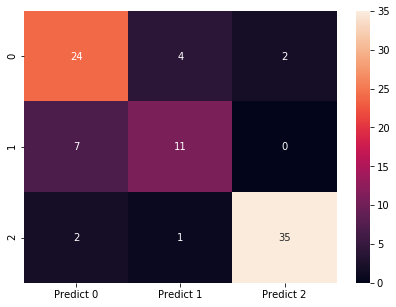

In [683]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test_out, predict_out, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1,2]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### KNN model when Oultiers are not removed (With and without Hypertuning)

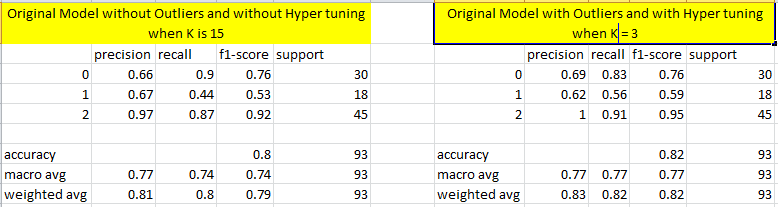

### KNN model when Oultiers are removed (With and without Hypertuning)

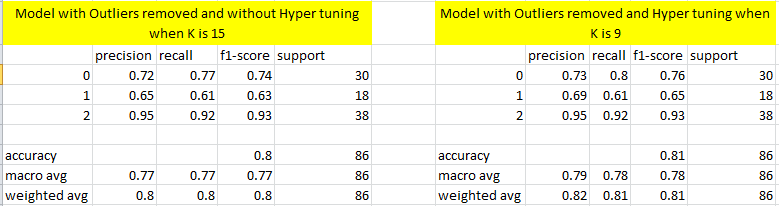

#### Question 1 Ends here

=================================================================================================================

## Question 2:

• DOMAIN: Banking and finance

• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.

• DATA DESCRIPTION: The data consists of the following attributes:

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

### PROJECT OBJECTIVE: 

Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

### Install the necessary libraries

In [334]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### 2.1. - Import and warehouse data:

### Question 2.1.1 - Import all the given datasets and explore shape and size of each.

In [335]:
Bank_Part1 = pd.read_csv('Part2 - Data1.csv')
Bank_Part2 = pd.read_csv('Part2 -Data2.csv')

In [336]:
print('Bank_Part1 shape is : {}'.format(Bank_Part1.shape))
print('Bank_Part2 shape is : {}'.format(Bank_Part2.shape))

Bank_Part1 shape is : (5000, 8)
Bank_Part2 shape is : (5000, 7)


In [337]:
Bank_Part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [338]:
Bank_Part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


#### From above info commands, we can see that two datasets i.e. Bank_Part1 and Bank_Part2 are having same number of rows but different set of columns where ID is the common one. 

Also, we can see that LoanOnCard column is having 4980 non-null values out of 5000. it means there could be 20 NULLS

### Question 2.1.2 - Merge all datasets onto one and explore final shape and size

In [390]:
Bank_Merge = pd.merge(Bank_Part1,Bank_Part2,how='outer',on='ID') # Both the Data frames are merged basis on the ID

In [391]:
print('Bank_Merge shape is : {}'.format(Bank_Merge.shape)) # Final Shape of the merged Data frame

Bank_Merge shape is : (5000, 14)


In [392]:
Bank_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [393]:
Bank_Merge.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


##### As per info command, it is visible that total number of entries are 5000 and number of columns are 14. 
##### LoanOnCard is having 20 NULLS i.e. 5000 - 4980 = 20.

### 2.2. - Data cleansing:

### Question 2.2.1 - Explore and if required correct the datatypes of each attribute

In [394]:
Bank_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [395]:
Bank_Merge.describe(include='all')

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


##### Datatype of all the columns are looking correct except LoanOnCard because it is having NULLL values and it will be changed to INT after doing the updates for NULL values

### Question 2.2.2 : Explore for null values in the attributes and if required drop or impute values.

In [396]:
# Different method to check the NUll values where the data type is bool
Bank_Merge.isnull().any()

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

##### From above command, we can see that yes the NULL values are present only in the LoanOnCard column

In [397]:
#Checking the presence of how many null values are present
Bank_Merge.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [398]:
# Total of 20 NULLS are present in LoanOnCard

In [399]:
# Lets replace with Zeroes
Bank_Merge.LoanOnCard = Bank_Merge.LoanOnCard.fillna('0')

In [400]:
#Checking the presence of how many null values are present
Bank_Merge.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [401]:
# now zero NULLS are present in the dataset and NULLS are replaced with zeroes

In [402]:
# Different method to check the NUll values where the data type is bool
Bank_Merge.isnull().any()

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard             False
dtype: bool

In [403]:
Bank_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 585.9+ KB


In [404]:
Bank_Merge['LoanOnCard'] = Bank_Merge['LoanOnCard'].astype('int64')

In [405]:
Bank_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [406]:
Bank_Merge.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [356]:
# Data type of the LoanOnCard is changed to Int64 now as it is holding only 0 and 1

## Data analysis & visualisation:

### Question 2.3.1: Perform detailed statistical analysis on the data.

In [357]:
Bank_Merge.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [358]:
# Check the skewness for Bank_Merge Dataframe
# HighestSpend, MonthlyAverageSpend , Mortgage are right skeyed. (Outliers present towards right) - 
# Also from above summary, we can see that Min value in the Customer since is -3 which might not be possible and needs to be treated 
# same be viewed in the Histograms below

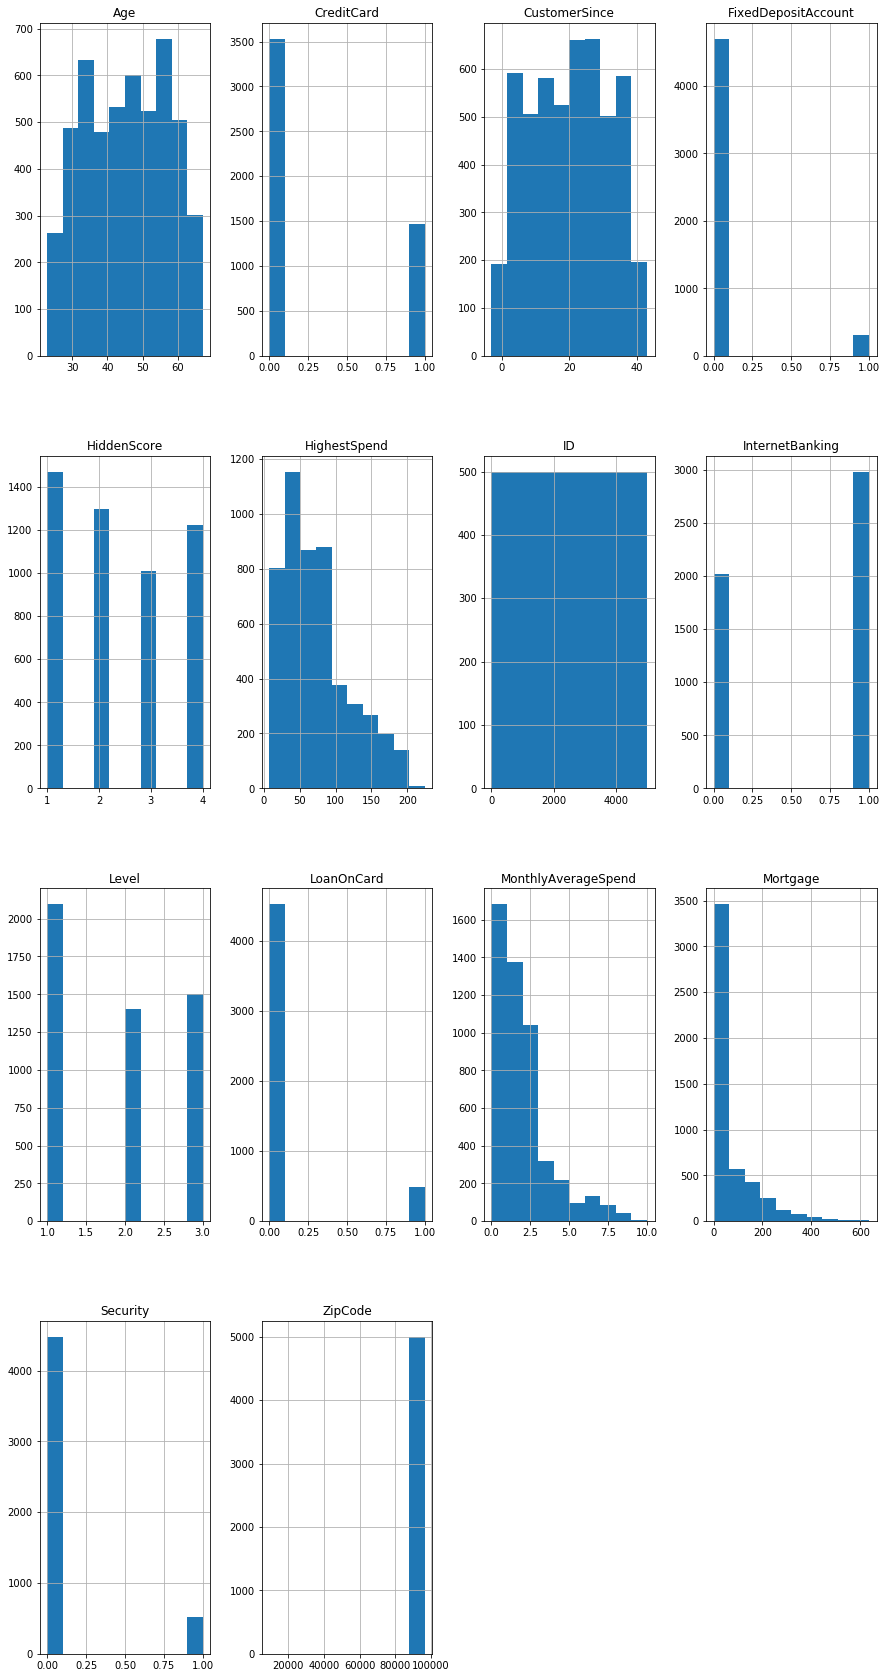

In [359]:
Bank_Merge.hist(figsize=(15,30));

#### From the above graphs, we can see that below are the categorical fields in the dataset:

CreditCard  

FixedDepositAccount

HiddenScore

InternetBanking

Level

LoanOnCard          

Security

ZipCode  

#### Quantative data:

Age - Normally Distributed

CustomerSince - Normalyy Distributed

HighestSpend - Right skeyed     

MonthlyAverageSpend - Right skeyed     

Mortgage - Right skeyed

In [360]:
# Check for the negative values in the CustomerSince column
print('Total number of rows where CustomerSince value is less than 0 are : {}'.format(Bank_Merge[Bank_Merge.CustomerSince < 0].CustomerSince.count())) 
print('Unique values in CustomerSince when less than 0 are : {}'.format(Bank_Merge[Bank_Merge.CustomerSince < 0].CustomerSince.unique()))

Total number of rows where CustomerSince value is less than 0 are : 52
Unique values in CustomerSince when less than 0 are : [-1 -2 -3]


In [361]:
Bank_Merge.CustomerSince = Bank_Merge.CustomerSince.replace(-1,Bank_Merge.CustomerSince.mean())
Bank_Merge.CustomerSince = Bank_Merge.CustomerSince.replace(-2,Bank_Merge.CustomerSince.mean())
Bank_Merge.CustomerSince = Bank_Merge.CustomerSince.replace(-3,Bank_Merge.CustomerSince.mean())

# Replace in the neagtive avvoues to Mean of the CustomerSince i.e. 20.104600

In [362]:
# Check for the negative values in the CustomerSince column
print('Total number of rows where CustomerSince value is less than 0 are : {}'.format(Bank_Merge[Bank_Merge.CustomerSince < 0].CustomerSince.count())) 
print('Unique values in CustomerSince when less than 0 are : {}'.format(Bank_Merge[Bank_Merge.CustomerSince < 0].CustomerSince.unique()))

Total number of rows where CustomerSince value is less than 0 are : 0
Unique values in CustomerSince when less than 0 are : []


In [363]:
Bank_Merge.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5000,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0000,55.00,67.0
CustomerSince,5000.0,20.329271,11.253001,0.0,11.00,20.1046,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0000,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0000,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0000,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5000,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0000,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0000,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0000,0.00,1.0


##### From above, we can see that minimum value of the CustomerSince is chnaged from -3 to 0.0 and all the negative alues are updated to Mean

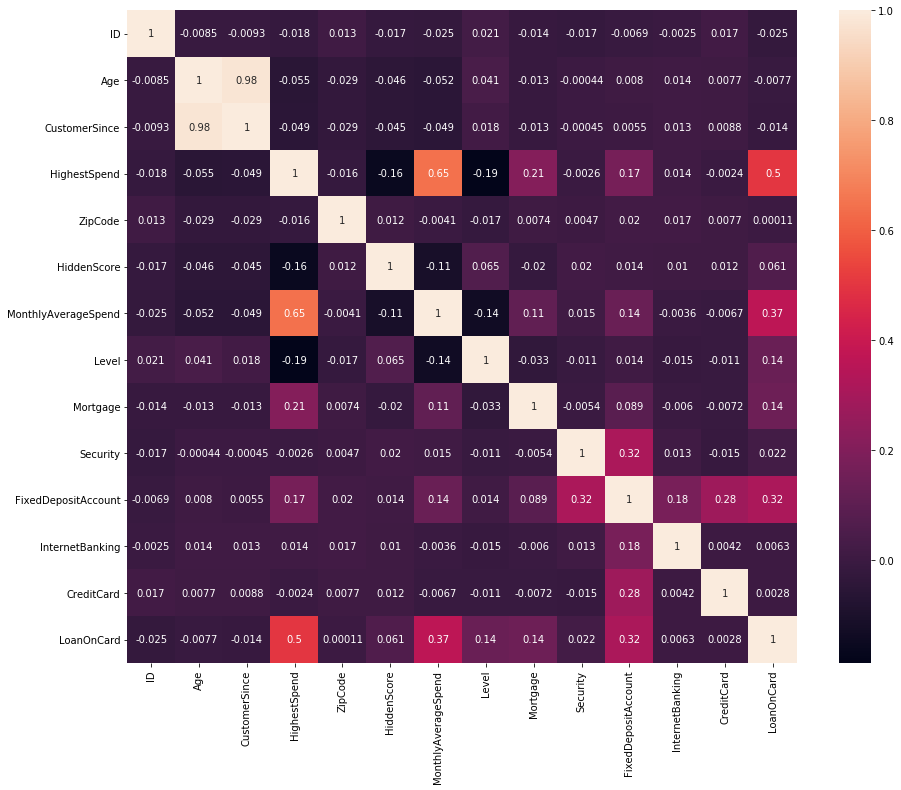

In [364]:
# lets find the correlation using the heatmap
fig = plt.subplots(figsize=(15,12))
sns.heatmap(Bank_Merge.corr(),annot=True);

##### From above we can draw below correlations:

1) Age and CustomerSince - .98

2) HighestSpend and MonthlyAverageSpend - .65

3) LoanOnCard and HighestSpend - .5

4) LoanOnCard and MonthlyAverageSpend - .37

5) LoanOnCard and FixedDepositAccount - .32

### Question 2.3.2: Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

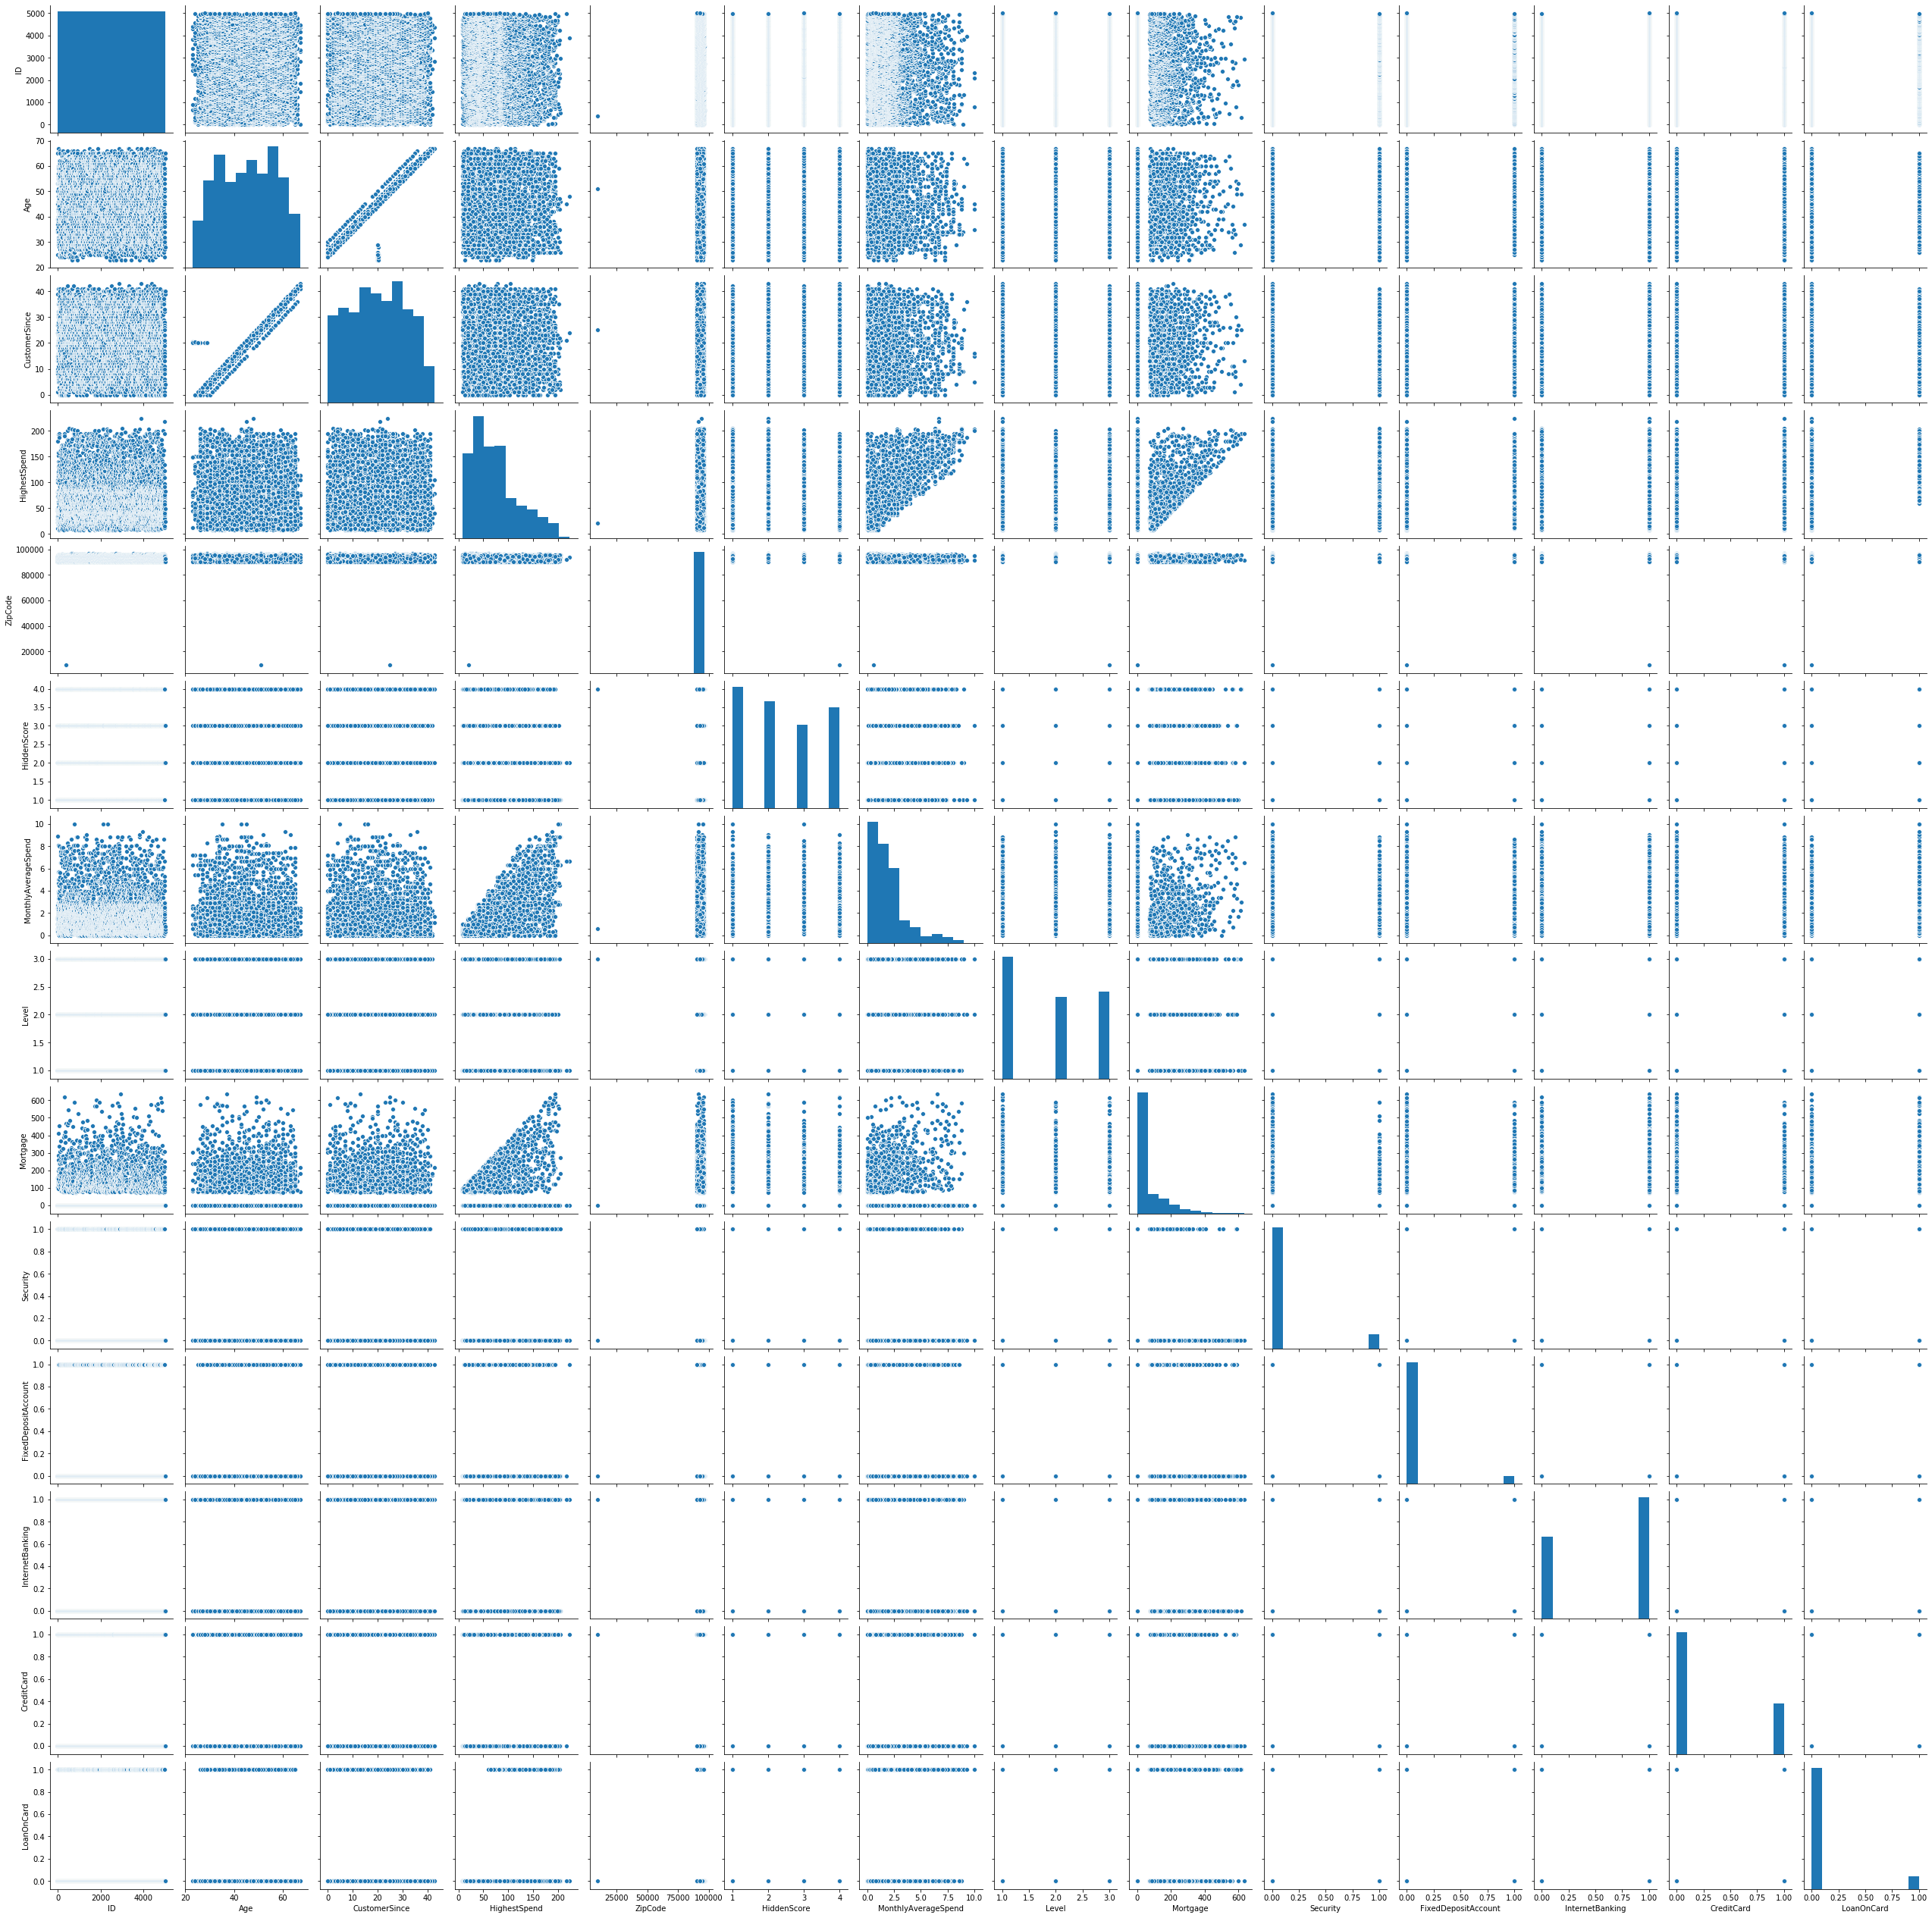

In [365]:
sns.pairplot(Bank_Merge);

In [366]:
##### Univariate of Age

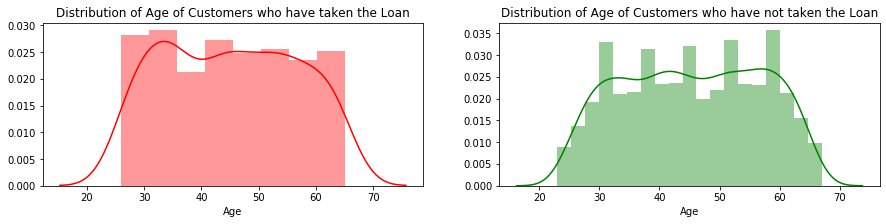

In [367]:
fig = plt.figure(figsize = (15,3))
plt.subplot(1, 2, 1)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 1].Age,color = 'r')
plt.title("Distribution of Age of Customers who have taken the Loan")
plt.subplot(1, 2, 2)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 0].Age,color = 'g')
plt.title("Distribution of Age of Customers who have not taken the Loan")
plt.show()

##### Age of Customers are normally distributed for customes who have taken or not taken the Loan so we can draw a conclusion on the which customers can be targeted for Loan

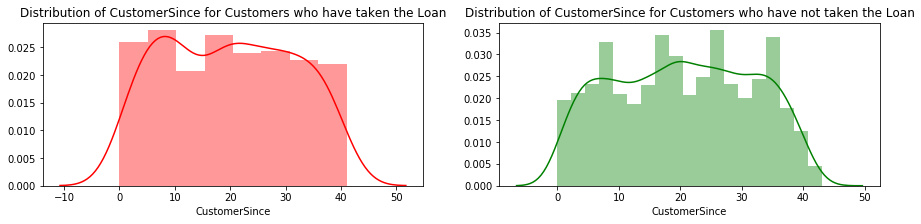

In [368]:
# Univariate of CustomerSince
fig = plt.figure(figsize = (15,3))
plt.subplot(1, 2, 1)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 1].CustomerSince,color = 'r')
plt.title("Distribution of CustomerSince for Customers who have taken the Loan")
plt.subplot(1, 2, 2)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 0].CustomerSince,color = 'g')
plt.title("Distribution of CustomerSince for Customers who have not taken the Loan")
plt.show()

##### CustomerSince is normally distributed for customes who have taken or not taken the Loan

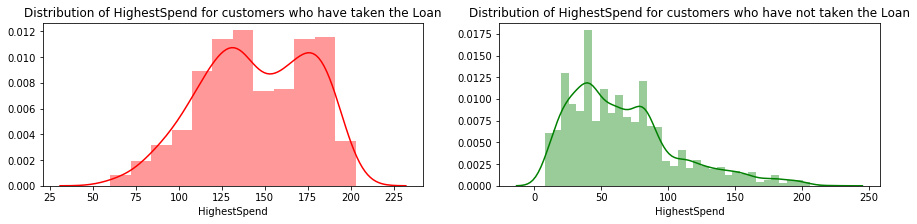

In [369]:
# Univariate of HighestSpend
fig = plt.figure(figsize = (15,3))
plt.subplot(1, 2, 1)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 1].HighestSpend,color = 'r')
plt.title("Distribution of HighestSpend for customers who have taken the Loan")
plt.subplot(1, 2, 2)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 0].HighestSpend,color = 'g')
plt.title("Distribution of HighestSpend for customers who have not taken the Loan")
plt.show()

##### HighestSpend is right skeyed for customers who have not taken the loan and bank can target those customers whose Highest Spend is around 175 or we can say that more than 150 as per the left graph

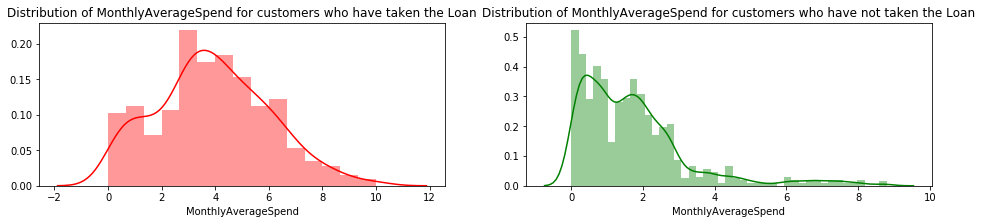

In [370]:
# Univariate of MonthlyAverageSpend
fig = plt.figure(figsize = (16,3))
plt.subplot(1, 2, 1)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 1].MonthlyAverageSpend,color = 'r')
plt.title("Distribution of MonthlyAverageSpend for customers who have taken the Loan")
plt.subplot(1, 2, 2)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 0].MonthlyAverageSpend,color = 'g')
plt.title("Distribution of MonthlyAverageSpend for customers who have not taken the Loan")
plt.show()

##### MonthlyAverageSpend is right skeyed for customers who have not taken the loan and this be possible because there could be very less  customer who are spending more on monthly basis. Basis on the Customer who have taken Loan, bank can target those customer whose MonthlyAverageSpend is more than 5

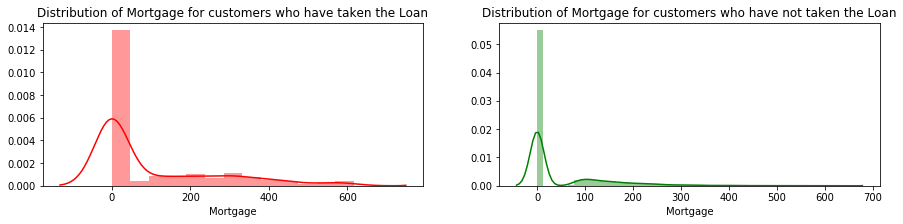

In [371]:
# Univariate of Mortgage
fig = plt.figure(figsize = (15,3))
plt.subplot(1, 2, 1)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 1].Mortgage,color = 'r')
plt.title("Distribution of Mortgage for customers who have taken the Loan")
plt.subplot(1, 2, 2)
sns.distplot(Bank_Merge[Bank_Merge.LoanOnCard == 0].Mortgage,color = 'g')
plt.title("Distribution of Mortgage for customers who have not taken the Loan")
plt.show()

##### Mortgage is right skeyed for both type of customer who have taken or not taken the Loan and lets check if there outliers for both. basis on the Customers who have taken loan, bank can target those customers who have Mortgage of more than 200

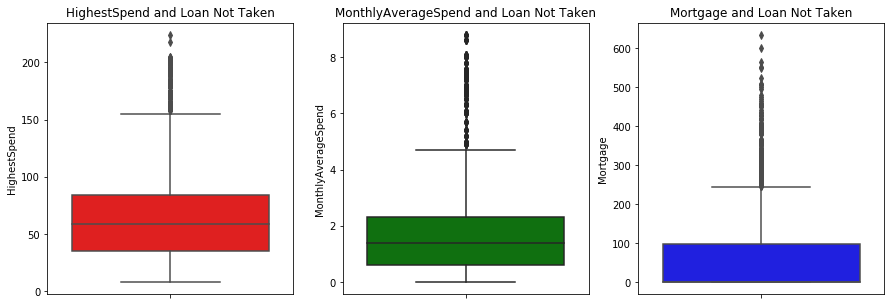

In [372]:
# Box Plots for HighestSpend, MonthlyAverageSpend, Mortgage where Customer has NOT taken the Loan

fig = plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.boxplot(y=Bank_Merge[Bank_Merge.LoanOnCard == 0].HighestSpend,color = 'r');
plt.title("HighestSpend and Loan Not Taken")

plt.subplot(1, 3, 2)
sns.boxplot(y=Bank_Merge[Bank_Merge.LoanOnCard == 0].MonthlyAverageSpend,color = 'g');
plt.title("MonthlyAverageSpend and Loan Not Taken")

plt.subplot(1, 3, 3)
sns.boxplot(y=Bank_Merge[Bank_Merge.LoanOnCard == 0].Mortgage,color = 'b');
plt.title("Mortgage and Loan Not Taken")

plt.show()

##### We can see that All above are having outliers in case the Loan is not Taken and it should not impact on the processing because out focus is not those customers who have  taken the loan

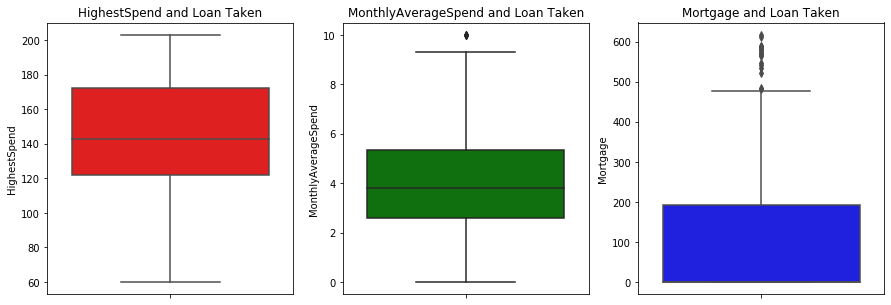

In [373]:
# Box Plots for HighestSpend, MonthlyAverageSpend, Mortgage where Customer has taken the Loan

fig = plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.boxplot(y=Bank_Merge[Bank_Merge.LoanOnCard == 1].HighestSpend,color = 'r');
plt.title("HighestSpend and Loan Taken")

plt.subplot(1, 3, 2)
sns.boxplot(y=Bank_Merge[Bank_Merge.LoanOnCard == 1].MonthlyAverageSpend,color = 'g');
plt.title("MonthlyAverageSpend and Loan Taken")

plt.subplot(1, 3, 3)
sns.boxplot(y=Bank_Merge[Bank_Merge.LoanOnCard == 1].Mortgage,color = 'b');
plt.title("Mortgage and Loan Taken")

plt.show()

In [374]:
# target Customers

Target_Customers = Bank_Merge[Bank_Merge.LoanOnCard == 0]
Target_Customers = Target_Customers[Target_Customers.HighestSpend > 150]
Target_Customers = Target_Customers[Target_Customers.MonthlyAverageSpend > 5]
Target_Customers = Target_Customers[Target_Customers.Mortgage > 200]
Target_Customers.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
ID,12.0,2172.500000,1286.537601,527.0,1196.7500,1888.50,3006.000,4332.0
Age,12.0,40.083333,10.031390,26.0,34.2500,38.50,44.250,61.0
CustomerSince,12.0,15.666667,10.066446,2.0,9.5000,14.50,20.000,37.0
HighestSpend,12.0,179.833333,16.672423,154.0,170.0000,179.50,194.250,205.0
ZipCode,12.0,92819.750000,1201.649633,91330.0,92013.2500,92115.50,93987.750,94720.0
HiddenScore,12.0,1.750000,0.452267,1.0,1.7500,2.00,2.000,2.0
MonthlyAverageSpend,12.0,7.219167,0.983615,6.0,6.4575,7.15,7.875,8.8
Level,12.0,1.000000,0.000000,1.0,1.0000,1.00,1.000,1.0
Mortgage,12.0,391.416667,130.200865,222.0,301.5000,341.00,479.000,635.0
Security,12.0,0.083333,0.288675,0.0,0.0000,0.00,0.000,1.0


In [375]:
Target_Customers

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
526,527,26,2.0,205,93106,1,6.33,1,271,0,0,0,1,0
915,916,53,28.0,184,94550,1,8.10,1,303,0,0,1,0,0
952,953,44,20.0,180,93943,2,7.60,1,524,0,0,0,1,0
1277,1278,45,20.0,194,92110,2,8.80,1,428,0,0,0,0,0
1354,1355,35,10.0,179,91942,1,8.60,1,357,0,0,0,0,0
1716,1717,32,8.0,200,91330,2,6.50,1,565,0,0,1,0,0
2059,2060,28,3.0,173,92121,2,6.70,1,222,0,0,1,0,0
2538,2539,37,12.0,175,92037,2,7.80,1,297,0,0,1,1,0
2934,2935,37,13.0,195,91763,2,6.50,1,635,0,0,1,0,0
3218,3219,40,16.0,154,94122,2,6.10,1,325,0,0,1,0,0


In [376]:
##### Above 8 Customers could be the Target Customers

##### Below analysis is for Categorical valriables now

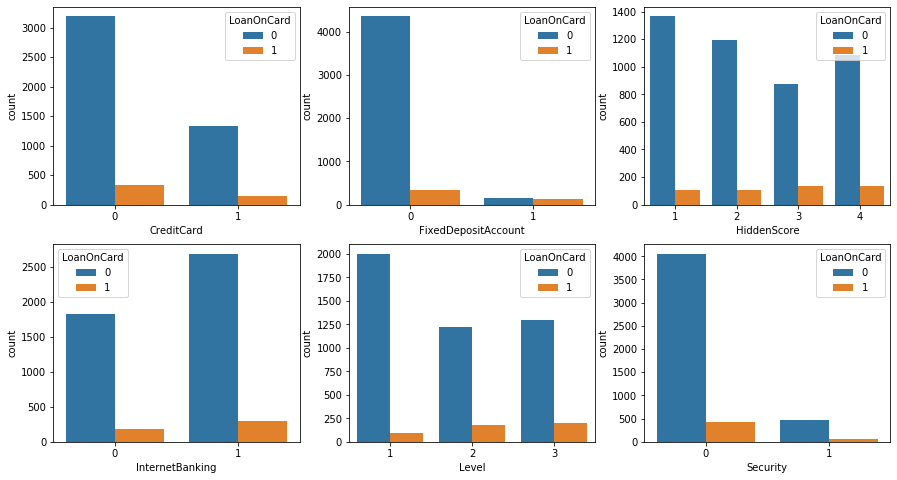

In [377]:
# Count Plot for CreditCard, FixedDepositAccount, HiddenScore, InternetBanking, Level, Security

fig = plt.figure(figsize = (15,8))
plt.subplot(2, 3, 1)
sns.countplot(Bank_Merge.CreditCard, hue=Bank_Merge.LoanOnCard);

plt.subplot(2, 3, 2)
sns.countplot(Bank_Merge.FixedDepositAccount, hue=Bank_Merge.LoanOnCard);

plt.subplot(2, 3, 3)
sns.countplot(Bank_Merge.HiddenScore, hue=Bank_Merge.LoanOnCard);

plt.subplot(2, 3, 4)
sns.countplot(Bank_Merge.InternetBanking, hue=Bank_Merge.LoanOnCard);

plt.subplot(2, 3, 5)
sns.countplot(Bank_Merge.Level, hue=Bank_Merge.LoanOnCard);

plt.subplot(2, 3, 6)
sns.countplot(Bank_Merge.Security, hue=Bank_Merge.LoanOnCard);

plt.show()

##### One of the Descripancy we can see from above graph is that, We have few customers who have taekn the Loan on card but they dont actually have the card, I have taken the assumption that Credit Card and Loan on Credit card are not related and they dont have any depencdeny like only those customers can take loan who have the caredit card.

1st Graph - Countplot for CreditCard : Customer who have taken Loan have less credit cards

2nd Graph - Countplot for FixedDepositAccount : Customer who have taken Loan have less Fixed Deposit accounts

3rd Graph - Countplot for HiddenScore : Distribution of Load on Card is same for all the hidden scores

4th Graph - Countplot for InternetBanking : Internet banking activated for Customers who have taken Loan is mmore in comparision to Customer who have not taken the loan

5th Graph - Countplot for Level : Customer who have taken loan are more associated with Level 3 and level 2

6th Graph - Countplot for Security : Customer who have taken Loan have less security assest

#### Removing the Outliers and creating New data frame i.e. Bank_Merge_Out which will be used after the first Model to improve the Recall an Accuracy 

In [407]:
# Creating a data set without the outliers

# HighestSpend_IQR = 
HighestSpend_Q1 = Bank_Merge.HighestSpend.quantile(0.25)
HighestSpend_Q3 = Bank_Merge.HighestSpend.quantile(0.75)
HighestSpend_IQR = HighestSpend_Q3-HighestSpend_Q1

# Lower Fence and Upper fence
Upper_Fence1 = HighestSpend_Q3 + (1.5 * HighestSpend_IQR)
Lower_Fence1 = HighestSpend_Q1 - (1.5 * HighestSpend_IQR)

# remove the Outliers from the Bank_Merge data frame 
Bank_Merge_Out =Bank_Merge
Bank_Merge_Out.drop(Bank_Merge_Out[(Bank_Merge_Out.HighestSpend > Upper_Fence1)&(Bank_Merge_Out.LoanOnCard == 0)].index,inplace=True)
Bank_Merge_Out.drop(Bank_Merge_Out[(Bank_Merge_Out.HighestSpend < Lower_Fence1) & (Bank_Merge_Out.LoanOnCard == 0)].index,inplace=True)
Bank_Merge_Out.ID.count()

4946

In [408]:
# Creating a data set without the outliers

# MonthlyAverageSpend_IQR = 
MonthlyAverageSpend_Q1 = Bank_Merge_Out.MonthlyAverageSpend.quantile(0.25)
MonthlyAverageSpend_Q3 = Bank_Merge_Out.MonthlyAverageSpend.quantile(0.75)
MonthlyAverageSpend_IQR = HighestSpend_Q3-HighestSpend_Q1

# Lower Fence and Upper fence
Upper_Fence2 = MonthlyAverageSpend_Q3 + (1.5 * MonthlyAverageSpend_IQR)
Lower_Fence2 = MonthlyAverageSpend_Q1 - (1.5 * MonthlyAverageSpend_IQR)

# remove the Outliers from the Bank_Merge data frame 
Bank_Merge_Out.drop(Bank_Merge_Out[(Bank_Merge_Out.MonthlyAverageSpend > Upper_Fence1)&(Bank_Merge_Out.LoanOnCard == 0)].index,inplace=True)
Bank_Merge_Out.drop(Bank_Merge_Out[(Bank_Merge_Out.MonthlyAverageSpend < Lower_Fence1) & (Bank_Merge_Out.LoanOnCard == 0)].index,inplace=True)
Bank_Merge_Out.ID.count()

4946

In [409]:
# Creating a data set without the outliers

# Mortgage_IQR = 
Mortgage_Q1 = Bank_Merge_Out.Mortgage.quantile(0.25)
Mortgage_Q3 = Bank_Merge_Out.Mortgage.quantile(0.75)
Mortgage_IQR = HighestSpend_Q3-HighestSpend_Q1

# Lower Fence and Upper fence
Upper_Fence3 = Mortgage_Q3 + (1.5 * Mortgage_IQR)
Lower_Fence3 = Mortgage_Q1 - (1.5 * Mortgage_IQR)

# remove the Outliers from the Bank_Merge data frame 
Bank_Merge_Out.drop(Bank_Merge_Out[(Bank_Merge_Out.Mortgage > Upper_Fence1)&(Bank_Merge_Out.LoanOnCard == 0)].index,inplace=True)
Bank_Merge_Out.drop(Bank_Merge_Out[(Bank_Merge_Out.Mortgage < Lower_Fence1) & (Bank_Merge_Out.LoanOnCard == 0)].index,inplace=True)
Bank_Merge_Out.ID.count()

4517

In [410]:
Bank_Merge_Out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4517 non-null   int64  
 1   Age                  4517 non-null   int64  
 2   CustomerSince        4517 non-null   int64  
 3   HighestSpend         4517 non-null   int64  
 4   ZipCode              4517 non-null   int64  
 5   HiddenScore          4517 non-null   int64  
 6   MonthlyAverageSpend  4517 non-null   float64
 7   Level                4517 non-null   int64  
 8   Mortgage             4517 non-null   int64  
 9   Security             4517 non-null   int64  
 10  FixedDepositAccount  4517 non-null   int64  
 11  InternetBanking      4517 non-null   int64  
 12  CreditCard           4517 non-null   int64  
 13  LoanOnCard           4517 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 529.3 KB


#### From above we can seee that 5000-4517 =  483 outliers are removed

## Data pre-processing:

### Question 2.4.1: Segregate predictors vs target attributes

In [450]:
# Predictors
# Dropping the ID, Age, ZipCode, HiddenScore and LoanOnCard
X = Bank_Merge.drop(['ID','Age','ZipCode','HiddenScore','LoanOnCard'],axis=1)

In [451]:
# Target
y = Bank_Merge['LoanOnCard']

In [452]:
X.describe(include='all').T # We can see that ID, Age, ZipCode, HiddenScore and LoanOnCard are dropped from the predictor dataframe

,count,mean,std,min,25%,50%,75%,max
CustomerSince,4517.0,20.197476,11.503628,-3.0,10.00,20.0,30.0,43.0
HighestSpend,4517.0,70.636263,44.870766,8.0,35.00,61.0,93.0,203.0
MonthlyAverageSpend,4517.0,1.870184,1.698063,0.0,0.67,1.5,2.5,10.0
Level,4517.0,1.909896,0.836809,1.0,1.00,2.0,3.0,3.0
Mortgage,4517.0,35.799867,76.221257,0.0,0.00,0.0,0.0,617.0
Security,4517.0,0.105822,0.307644,0.0,0.00,0.0,0.0,1.0
FixedDepositAccount,4517.0,0.061545,0.240354,0.0,0.00,0.0,0.0,1.0
InternetBanking,4517.0,0.599513,0.490051,0.0,0.00,1.0,1.0,1.0
CreditCard,4517.0,0.295329,0.456241,0.0,0.00,0.0,1.0,1.0


### Question 2.4.2: Check for target balancing and fix it if found imbalanced

In [453]:
print('LoanOnCard = 1 in original dataframe are {} %'.format(len(Bank_Merge[Bank_Merge.LoanOnCard == 1])/len(Bank_Merge)*100))
print('LoanOnCard = 0 in original dataframe are {} %'.format(len(Bank_Merge[Bank_Merge.LoanOnCard == 0])/len(Bank_Merge)*100))

LoanOnCard = 1 in original dataframe are 10.626522027894621 %
LoanOnCard = 0 in original dataframe are 89.37347797210538 %


### Question 2.4.3: Perform train-test split

In [454]:
# Split X and y into training and test set in 70:30 ratio
# Stratify is used to make sure that data is classided proportionally basis on the classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [455]:
print('LoanOnCard = 1 in Train dataframe are {} %'.format(len(y_train[y_train == 1])/len(y_train)*100))
print('LoanOnCard = 0 in Train dataframe are {} %'.format(len(y_train[y_train == 0])/len(y_train)*100))

LoanOnCard = 1 in Train dataframe are 10.629547611515342 %
LoanOnCard = 0 in Train dataframe are 89.37045238848465 %


In [456]:
print('LoanOnCard = 1 in Test dataframe are {} %'.format(len(y_test[y_test == 1])/len(y_test)*100))
print('LoanOnCard = 0 in Test dataframe are {} %'.format(len(y_test[y_test == 0])/len(y_test)*100))

LoanOnCard = 1 in Test dataframe are 10.619469026548673 %
LoanOnCard = 0 in Test dataframe are 89.38053097345133 %


## Model training, testing and tuning

### Question 2.5.1: Design and train a Logistic regression and Naive Bayes classifiers

In [457]:
# Logistic regression model
Log_reg = LogisticRegression(solver="liblinear")
Log_reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Question 2.5.2: Display the classification accuracies for train and test data

In [458]:
predicted_labels = Log_reg.predict(X_test)
print('Accuracy for train dataset: {} '.format(Log_reg.score(X_train, y_train)))
print('Accuracy for test dataset: {} '.format(Log_reg.score(X_test, y_test)))

Accuracy for train dataset: 0.9563429294527048 
Accuracy for test dataset: 0.9601769911504425 


In [459]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[1202   10]
 [  44  100]]


Confusion Matrix


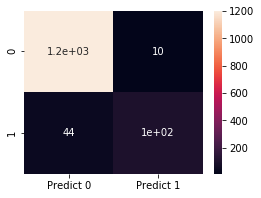

In [460]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True)

### Question 2.5.3: Display and explain the classification report in detail

In [461]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1212
           1       0.91      0.69      0.79       144

    accuracy                           0.96      1356
   macro avg       0.94      0.84      0.88      1356
weighted avg       0.96      0.96      0.96      1356



In [462]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1202   10]
 [  44  100]]


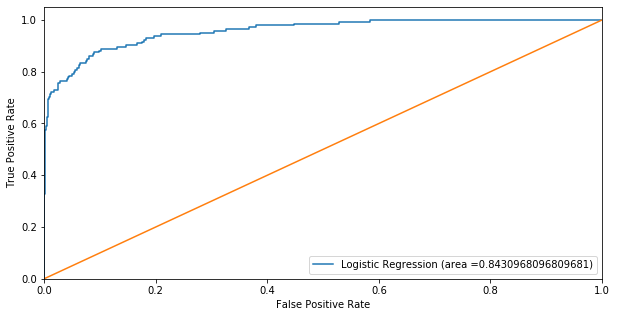

In [463]:
# ROC Curve
roc_lr = roc_auc_score(y_test, Log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize = (10 , 5))
lable = 1
plt.plot(fpr, tpr, label = 'Logistic Regression (area =' + str(roc_lr) + ')')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

#### From Above, we can see that Accuracy score 96% on the testing Dataset which very good but we also need to consider on the Recall paramter i.e. 74% which displays that out of 144 only 106 are predicted on the test data which can be improved. 

#### We need to create a model which should predict more Customer who can be the target one which could go for Loan and model should not fail to predict these ones. Same case happens in the COVID case that model should predict more persons who can have the covid and testing needs to be performed ont those ones.

#### We can also try to create the model without the outliers which we have already calculated in the starting with the Bank_Merge_Out data frame

In [464]:
# Predictors
# Dropping the ID, Age, ZipCode, HiddenScore and LoanOnCard
X_out = Bank_Merge_Out.drop(['ID','Age','ZipCode','HiddenScore','LoanOnCard'],axis=1)

In [465]:
# Target
y_out = Bank_Merge_Out['LoanOnCard']
y_out.count()

4517

In [466]:
X_out.describe(include='all').T # We can see that ID, Age, ZipCode, HiddenScore and LoanOnCard are dropped from the predictor dataframe

,count,mean,std,min,25%,50%,75%,max
CustomerSince,4517.0,20.197476,11.503628,-3.0,10.00,20.0,30.0,43.0
HighestSpend,4517.0,70.636263,44.870766,8.0,35.00,61.0,93.0,203.0
MonthlyAverageSpend,4517.0,1.870184,1.698063,0.0,0.67,1.5,2.5,10.0
Level,4517.0,1.909896,0.836809,1.0,1.00,2.0,3.0,3.0
Mortgage,4517.0,35.799867,76.221257,0.0,0.00,0.0,0.0,617.0
Security,4517.0,0.105822,0.307644,0.0,0.00,0.0,0.0,1.0
FixedDepositAccount,4517.0,0.061545,0.240354,0.0,0.00,0.0,0.0,1.0
InternetBanking,4517.0,0.599513,0.490051,0.0,0.00,1.0,1.0,1.0
CreditCard,4517.0,0.295329,0.456241,0.0,0.00,0.0,1.0,1.0


In [467]:
print('LoanOnCard = 1 in original dataframe are {} %'.format(len(Bank_Merge_Out[Bank_Merge_Out.LoanOnCard == 1])/len(Bank_Merge_Out)*100))
print('LoanOnCard = 0 in original dataframe are {} %'.format(len(Bank_Merge_Out[Bank_Merge_Out.LoanOnCard == 0])/len(Bank_Merge_Out)*100))

LoanOnCard = 1 in original dataframe are 10.626522027894621 %
LoanOnCard = 0 in original dataframe are 89.37347797210538 %


In [468]:
# Split X and y into training and test set in 70:30 ratio
# Stratify is used to make sure that data is classided proportionally basis on the classes
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size=0.30, stratify=y_out)

In [469]:
print('LoanOnCard = 1 in Train dataframe are {} %'.format(len(y_train_out[y_train_out == 1])/len(y_train_out)*100))
print('LoanOnCard = 0 in Train dataframe are {} %'.format(len(y_train_out[y_train_out == 0])/len(y_train_out)*100))

LoanOnCard = 1 in Train dataframe are 10.629547611515342 %
LoanOnCard = 0 in Train dataframe are 89.37045238848465 %


In [470]:
print('LoanOnCard = 1 in Test dataframe are {} %'.format(len(y_test_out[y_test_out == 1])/len(y_test_out)*100))
print('LoanOnCard = 0 in Test dataframe are {} %'.format(len(y_test_out[y_test_out == 0])/len(y_test_out)*100))

LoanOnCard = 1 in Test dataframe are 10.619469026548673 %
LoanOnCard = 0 in Test dataframe are 89.38053097345133 %


In [471]:
# Logistic regression model
Log_reg_out = LogisticRegression(solver="liblinear")
Log_reg_out.fit(X_train_out, y_train_out)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [472]:
predicted_labels_out = Log_reg_out.predict(X_test_out)
print('Accuracy for train dataset: {} '.format(Log_reg_out.score(X_train_out, y_train_out)))
print('Accuracy for test dataset: {} '.format(Log_reg_out.score(X_test_out, y_test_out)))

Accuracy for train dataset: 0.9534957291996203 
Accuracy for test dataset: 0.9646017699115044 


In [473]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test_out, predicted_labels_out))

[[1203    9]
 [  39  105]]


Confusion Matrix


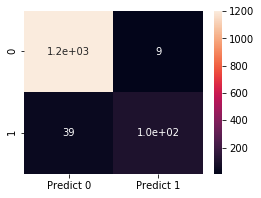

In [474]:
print("Confusion Matrix")
cm_out=metrics.confusion_matrix(y_test_out, predicted_labels_out, labels=[0,1])

df_cm_out = pd.DataFrame(cm_out, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm_out, annot=True)

In [475]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_out,predicted_labels_out))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1212
           1       0.92      0.73      0.81       144

    accuracy                           0.96      1356
   macro avg       0.94      0.86      0.90      1356
weighted avg       0.96      0.96      0.96      1356



In [476]:
print(metrics.confusion_matrix(y_test_out, predicted_labels_out))

[[1203    9]
 [  39  105]]


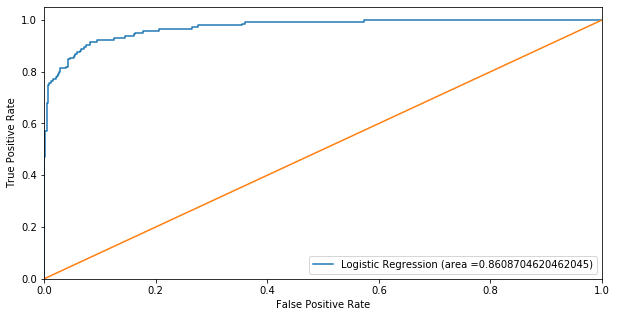

In [477]:
# ROC Curve
roc_lr = roc_auc_score(y_test_out, Log_reg_out.predict(X_test_out))
fpr, tpr, thresholds = roc_curve(y_test_out, Log_reg_out.predict_proba(X_test_out)[:,1])
plt.figure(figsize = (10 , 5))
lable = 1
plt.plot(fpr, tpr, label = 'Logistic Regression (area =' + str(roc_lr) + ')')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

#### From above we can see that recall has beeen increased from 60% to 70% now and Area under the Curver is also increased from 79% 85%

### Question 2.5.4: Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model

In [478]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [0.01, 0.1, 1.0, 10, 100]

#Convert to dictionary
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)

#Create new Log object
Log_tune = LogisticRegression()

#Use GridSearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
Grid = GridSearchCV(estimator=Log_tune, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

#Fit the model
best_model1 = Grid.fit(X_train_out, y_train_out)

#Print The value of best Hyperparameters
print('Best parameters:', best_model1.best_params_)
print('Best Score:', best_model1.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.9569736719509109


In [479]:
predict_out = best_model1.predict(X_test_out)
print('Testing Accuracy with Tuning: {}'.format(best_model1.score(X_test_out, y_test_out)))
print('Training Accuracy with Tuning: {}'.format(best_model1.score(X_train_out, y_train_out)))

Testing Accuracy with Tuning: 0.9668141592920354
Training Accuracy with Tuning: 0.9579247073710851


Confusion Matrix


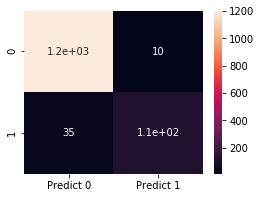

In [480]:
print("Confusion Matrix")
cm_out1=metrics.confusion_matrix(y_test_out, predict_out, labels=[0,1])

df_cm_out1 = pd.DataFrame(cm_out1, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm_out1, annot=True)

In [481]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_out,predict_out))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1212
           1       0.92      0.76      0.83       144

    accuracy                           0.97      1356
   macro avg       0.94      0.87      0.91      1356
weighted avg       0.97      0.97      0.97      1356



In [482]:
print(metrics.confusion_matrix(y_test_out, predict_out))

[[1202   10]
 [  35  109]]


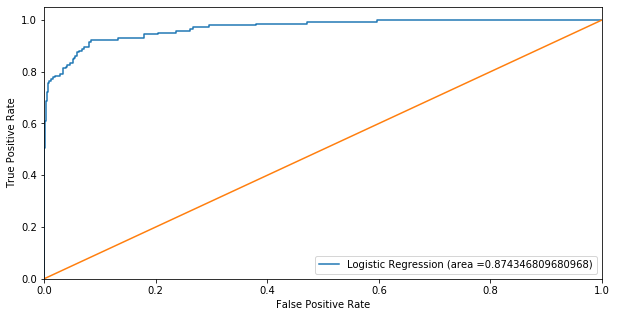

In [483]:
# ROC Curve
roc_lr = roc_auc_score(y_test_out, best_model1.predict(X_test_out))
fpr, tpr, thresholds = roc_curve(y_test_out, best_model1.predict_proba(X_test_out)[:,1])
plt.figure(figsize = (10 , 5))
lable = 1
plt.plot(fpr, tpr, label = 'Logistic Regression (area =' + str(roc_lr) + ')')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

#### Now with Hypertuned model, We can see that Recall is increased from 70% to 74% and Area under the Curve is also cinreased from 84.5% to 86.1%

### Model with Naive Bayes

In [484]:
# Naive Bayes
NB_Model = GaussianNB()
NB_Model.fit(X_train_out, y_train_out)

GaussianNB(priors=None, var_smoothing=1e-09)

In [485]:
predict_NB_Model = NB_Model.predict(X_test_out)
print('Testing Accuracy with Naive Bayes: {}'.format(NB_Model.score(X_test_out, y_test_out)))
print('Training Accuracy with Naive Bayes: {}'.format(NB_Model.score(X_train_out, y_train_out)))

Testing Accuracy with Naive Bayes: 0.9129793510324484
Training Accuracy with Naive Bayes: 0.9031951913951282


Confusion Matrix


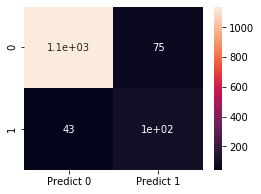

In [486]:
print("Confusion Matrix")
cm_out_NB=metrics.confusion_matrix(y_test_out, predict_NB_Model, labels=[0,1])

df_cm_out_NB = pd.DataFrame(cm_out_NB, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm_out_NB, annot=True)

In [487]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_out,predict_NB_Model))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1212
           1       0.57      0.70      0.63       144

    accuracy                           0.91      1356
   macro avg       0.77      0.82      0.79      1356
weighted avg       0.92      0.91      0.92      1356



In [488]:
print(metrics.confusion_matrix(y_test_out, predict_NB_Model))

[[1137   75]
 [  43  101]]


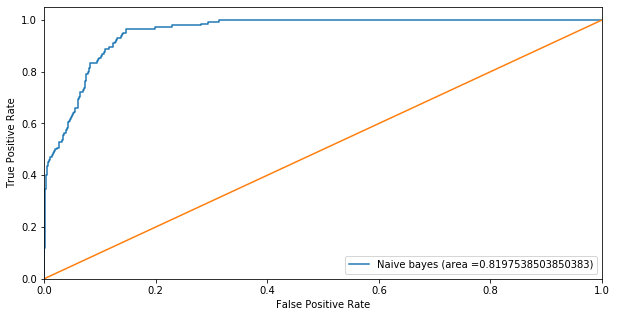

In [489]:
# ROC Curve
roc_lr = roc_auc_score(y_test_out, NB_Model.predict(X_test_out))
fpr, tpr, thresholds = roc_curve(y_test_out, NB_Model.predict_proba(X_test_out)[:,1])
plt.figure(figsize = (10 , 5))
lable = 1
plt.plot(fpr, tpr, label = 'Naive bayes (area =' + str(roc_lr) + ')')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

#### Above details are for Naive bayes, Where Accuracy is 90%, Recall is 64% and Area under the Curve is 78%

## Conclusion and improvisation:

### Question 2.6.1 - Write your conclusion on the results.

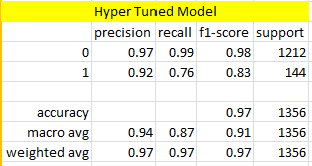

### Above is best model derived from the Logistic regression and can be used to dervie the results

##### Above details are for Hypertuned model and this is best in terms for Accuracy, recall and Area under the curve

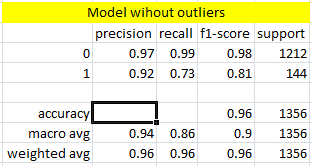

#### Above model is without the Outliers and it is less in comparisio with the Hypertuned model

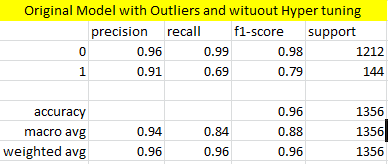

#### Above model is the original one and with the outiers and without the hypertuning

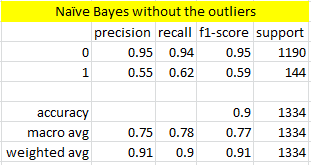

#### Above model is the Naive Bayes one and without the outiers and without the hypertuning

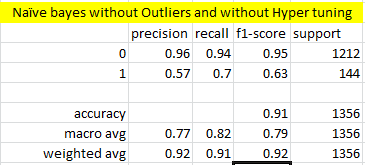